In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib
import matplotlib.pyplot as plt

In [3]:
import display
import dataloader
from dataloader import ThermalData
import clustering
import anomaly_detection

In [4]:
import module_extraction
#from module_extraction import Filters, Modules
from module_extraction_ortho import Filters, Modules

In [5]:
input_img_path = "./images/ortho/chiba.tif"
input_img_path = "./images/ortho/1391.tif"

In [6]:
input_dir_path = "./images/"+input_img_path.split("/")[-1][:-4]
print(input_dir_path)

./images/chiba


画像データの取得

In [7]:
thermal_img_files = dataloader.get_img_files(dir_path=input_dir_path+"/modules",gray=False)
#thermal_img_files_gray = dataloader.get_img_files(dir_path=input_dir_path+"/modules",gray=True)

In [8]:
type(thermal_img_files), len(thermal_img_files)

(dict, 2052)

In [9]:
img_org = cv2.imread(input_img_path, 0)

モジュール情報の取得

In [10]:
import pickle
with open(input_dir_path+'/module_contours.pkl', 'rb') as pkl:
    module_contours = pickle.load(pkl)
with open(input_dir_path+'/module_labels.pkl', 'rb') as pkl:
    module_labels = pickle.load(pkl)

温度分布の確認

In [11]:
data = ThermalData(thermal_img_files, scale_type="individual")

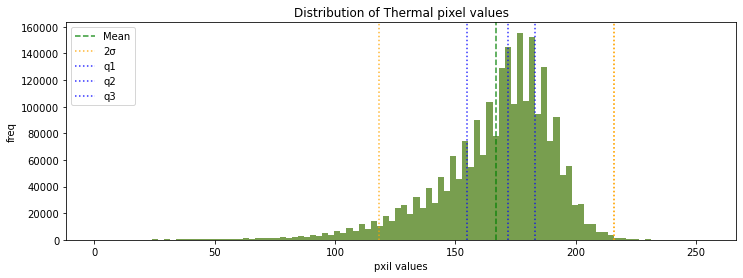

In [12]:
display.display_distributions(data.all_temperature, 
                              filepath = "hist_all_temperature.jpg")

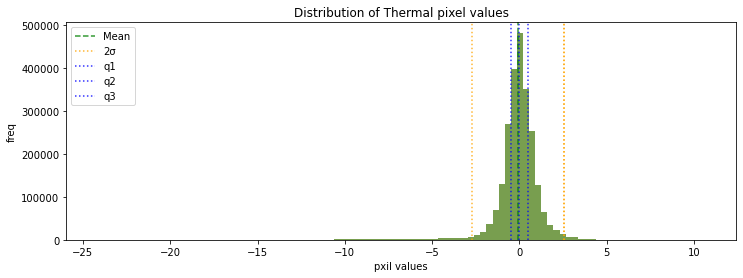

In [13]:
display.display_distributions(data.scaled_all_temperature,
                              filepath = "hist_scaled_all_temperature.jpg")

温度分布の確認（アレイごと）

In [14]:
module_labels.shape

(2052,)

In [15]:
from sklearn import preprocessing

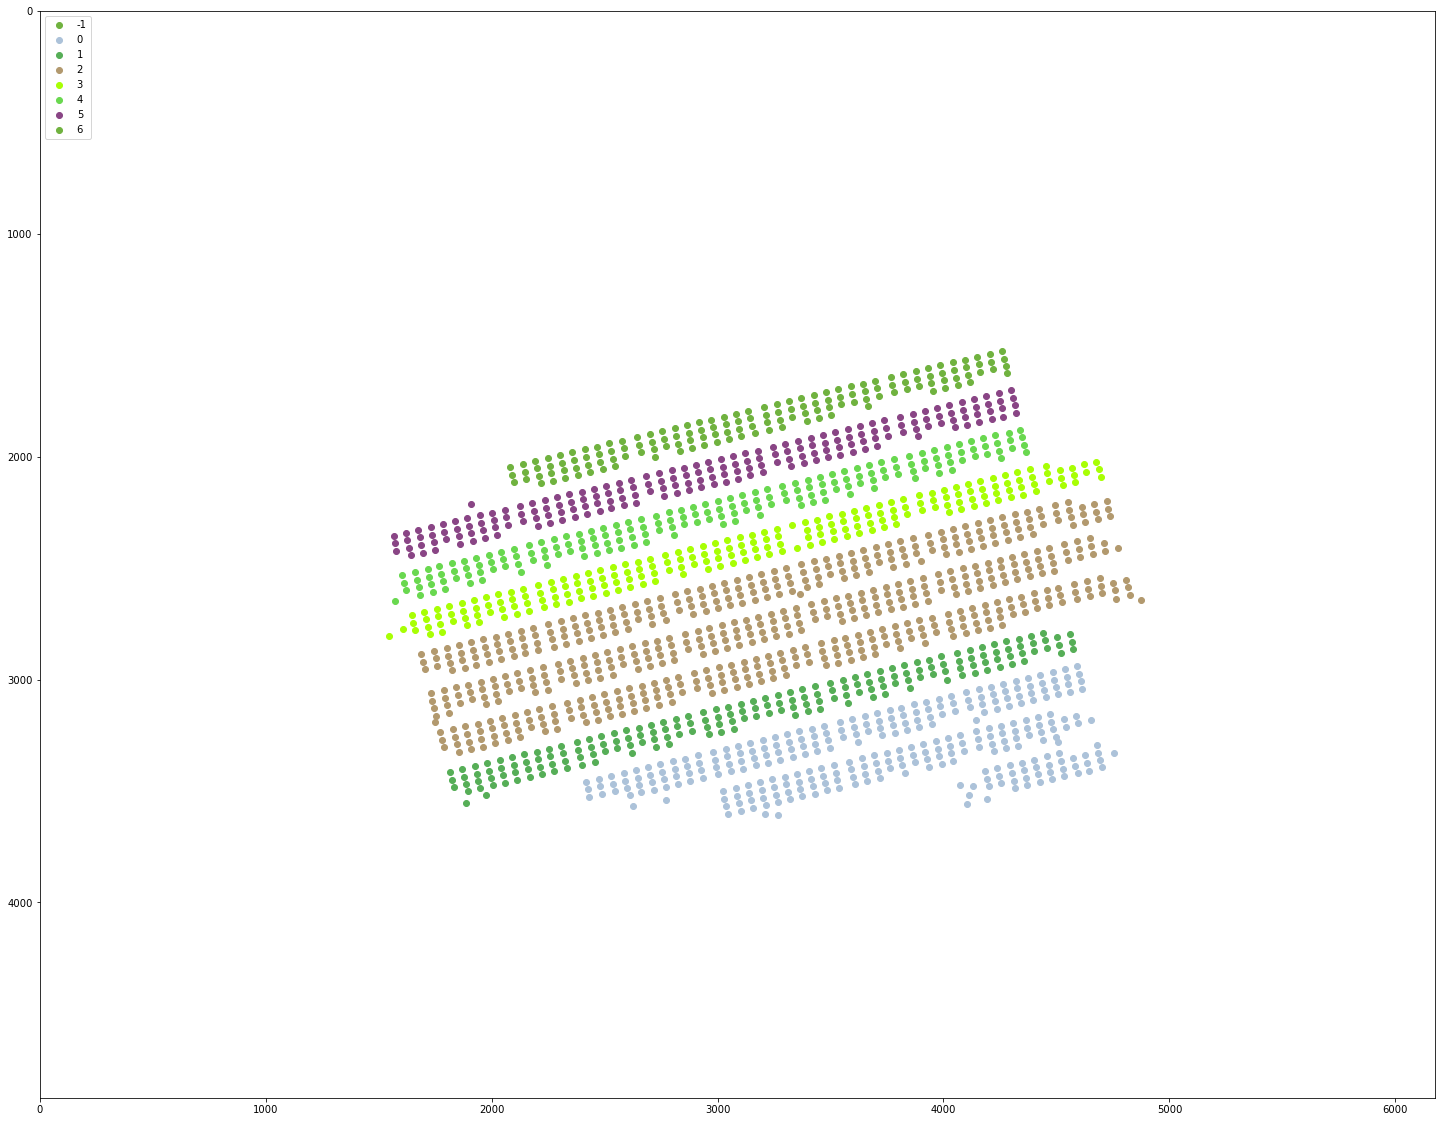

In [17]:
fig, ax = plt.subplots(facecolor="w", figsize=(25,20))
#cmap = plt.get_cmap("tab20")
colors = list(matplotlib.colors.XKCD_COLORS.items())[:max(module_labels)]
module_centers = np.array( [c.mean(axis=0) for c in module_contours] )
for i in range(-1,max(module_labels)):
    data = module_centers[module_labels == i]
    plt.scatter(data[:, 0], data[:, 1], color=colors[i][1], label=str(i))
#plt.scatter(module_centers[:, 0], module_centers[:, 1], color=cmap(module_labels+1), label=)
ax.legend(loc='upper left')
ax.set_xlim([0, img_org.shape[1]])
ax.set_ylim([img_org.shape[0], 0])
plt.show()

In [18]:
# This will be implemented in ThermalData class
data_array = {}; array_scaler= {}; 
threshold_upper_bound = {}
threshold_lower_bound = {}
for c in range(0,max(module_labels)):
    indices = np.where(module_labels==c)
    np.where(module_labels==c)
    target_thermal_img_files = pd.Series(thermal_img_files).iloc[indices]
    data_array[c] = ThermalData(target_thermal_img_files, scale_type="individual")
    rscaler = preprocessing.RobustScaler()
    array_scaler[c] = rscaler.fit(data_array[c].all_temperature)    

module label: 0


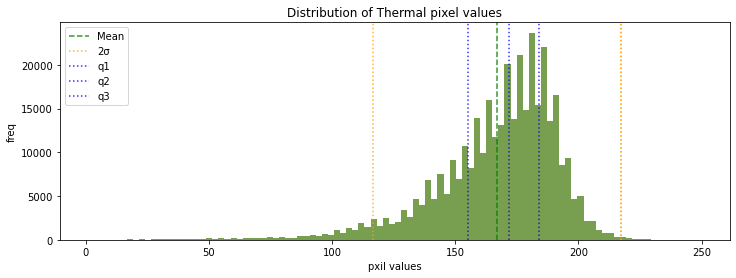

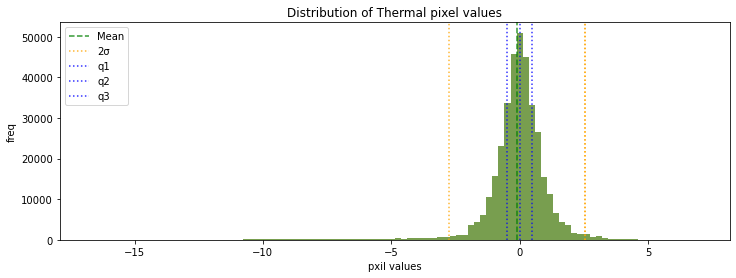

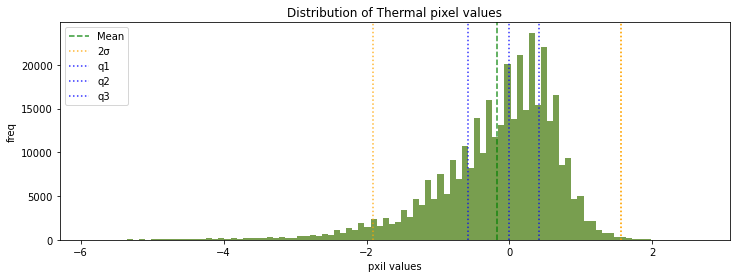

module label: 1


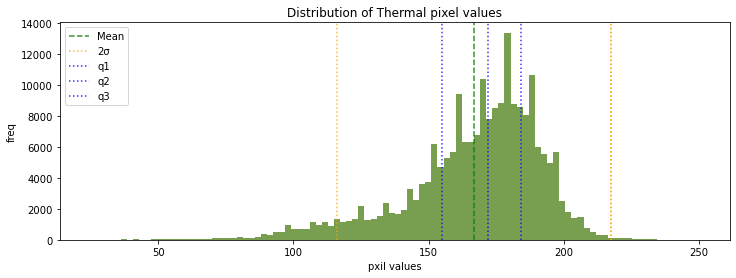

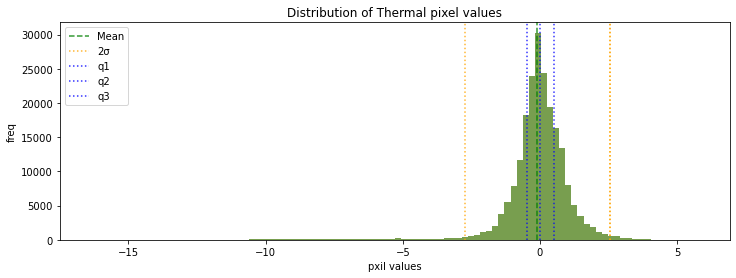

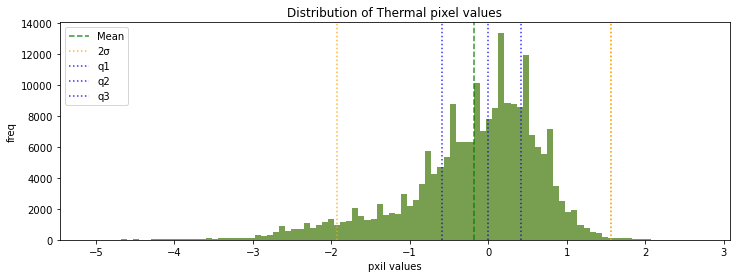

module label: 2


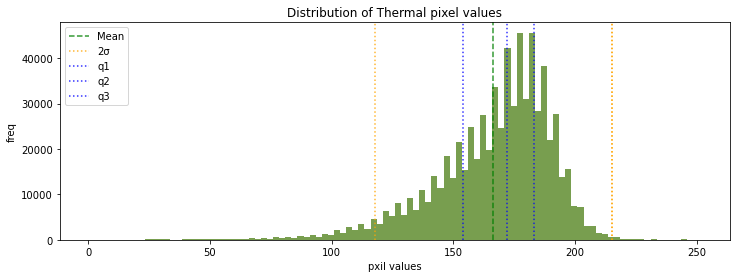

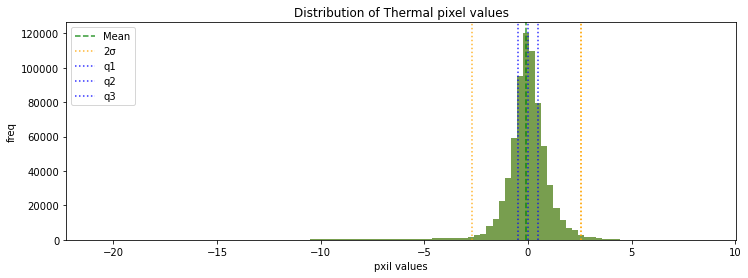

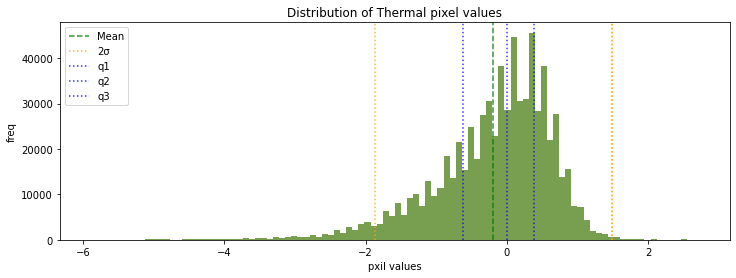

module label: 3


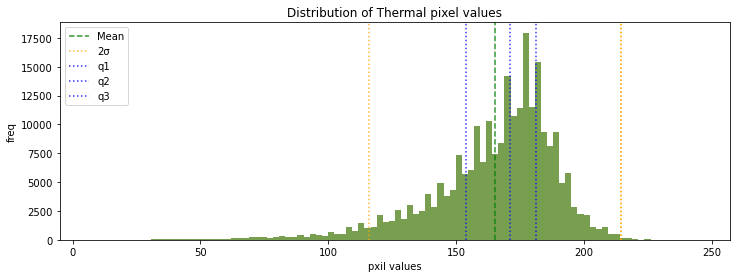

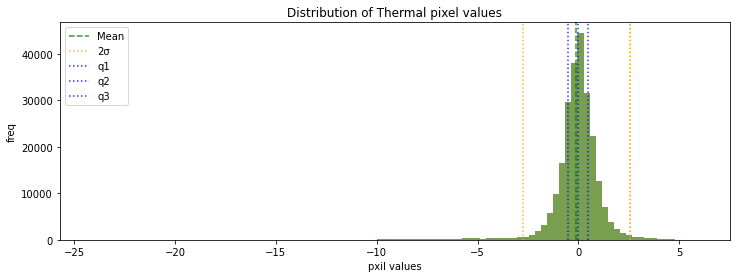

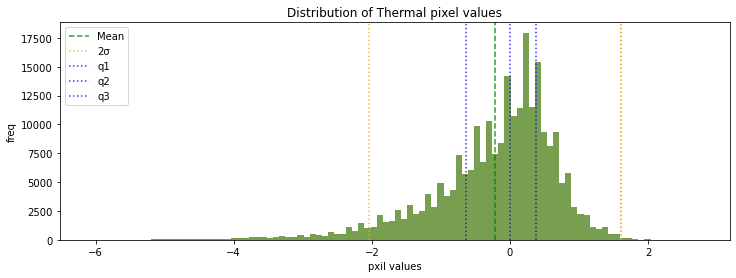

module label: 4


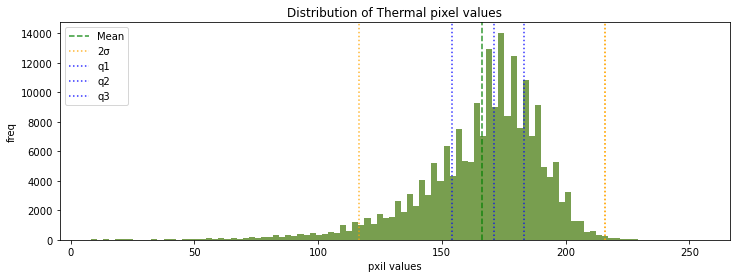

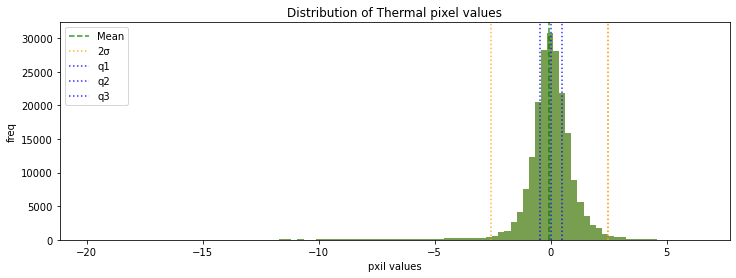

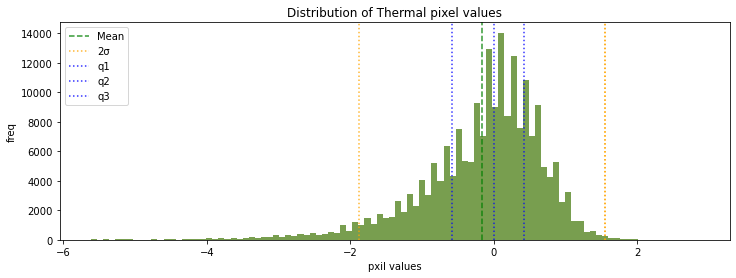

module label: 5


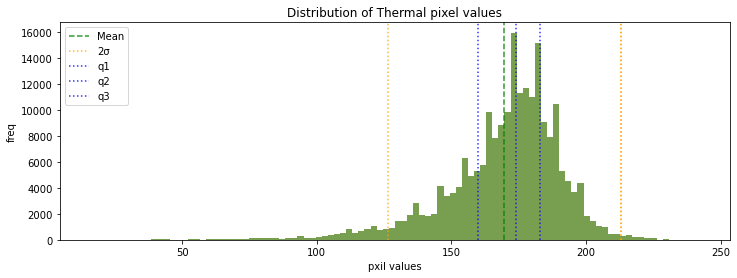

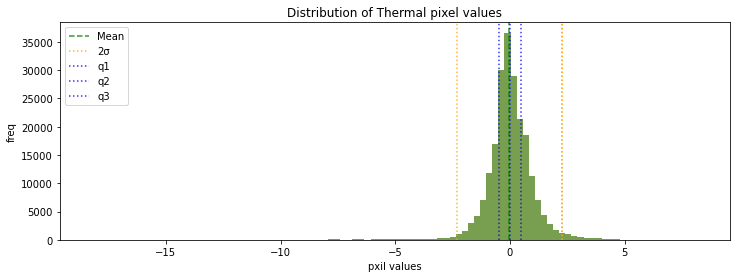

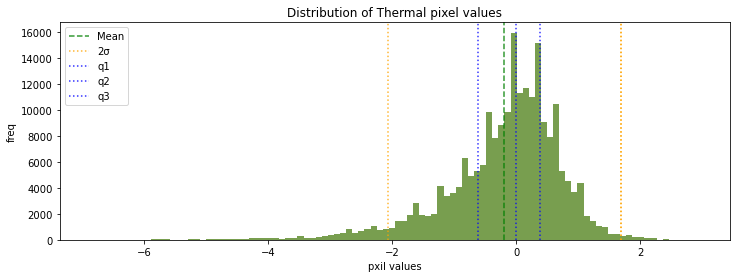

module label: 6


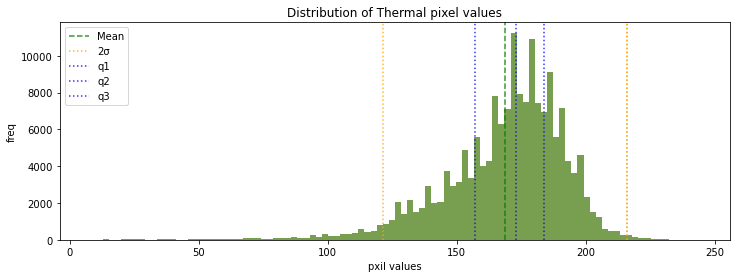

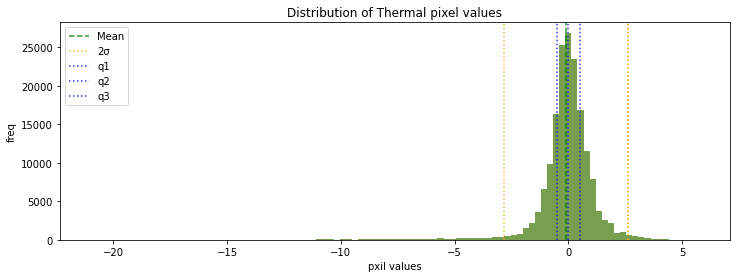

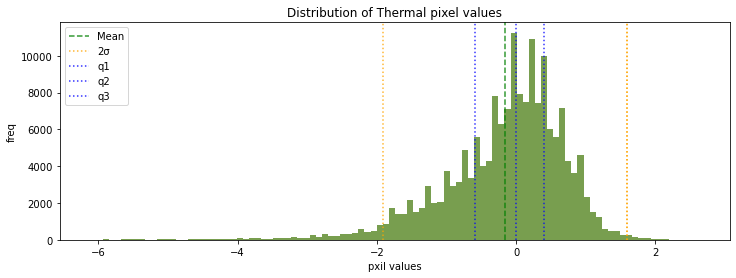

In [19]:
for k, v in data_array.items():
    print("module label:",k)
    display.display_distributions(v.all_temperature, 
                              filepath = "hist_all_temperature.jpg")
    display.display_distributions(v.scaled_all_temperature, 
                              filepath = "hist_scaled_all_temperature.jpg")        
    display.display_distributions(array_scaler[k].transform(v.all_temperature), 
                              filepath = "hist_transformed_all_temperature.jpg")

異常タイプの確認テスト

In [20]:
def get_hotspots_in_array(transformed_clusters_temperature, img_file, log=False):
    # -- hot cluster --
    hot_clusters = (transformed_clusters_temperature.mean(axis=1) > 1.5)
    # -- hot pixcel --
    hot_pixels = np.array([c in np.where(hot_clusters==True)[0] for c in clusters.labels])
    hot_pixels = hot_pixels.reshape(*img_file.shape[:2],1)      
    if log:
        print("Hot cluster labels in array:",hot_clusters)
        print("Hotspot weights in array:",hot_pixels.mean())
    return hot_pixels, hot_clusters

In [21]:
def get_hotspots_in_module(
    scaled_clusters_temperature, transformed_clusters_temperature, img_file, log=False):
    # -- hot cluster --
    hot_clusters = (scaled_clusters_temperature.mean(axis=1) > 3.0) \
    & (transformed_clusters_temperature.mean(axis=1) > 0)
    # -- hot pixcel --
    hot_pixels = np.array([c in np.where(hot_clusters==True)[0] for c in clusters.labels])
    hot_pixels = hot_pixels.reshape(*img_file.shape[:2],1)      
    if log:
        print("Hot cluster labels in module:",hot_clusters)
        print("Hotspot weights in module:",hot_pixels.mean())
    return hot_pixels, hot_clusters

In [22]:
clustering_method="kmeans"
#clustering_method="xmeans" # not stable
#clustering_method="dbscan"

1421.jpg Single-Hotspot


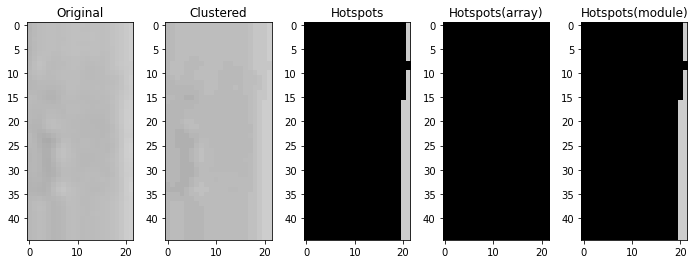

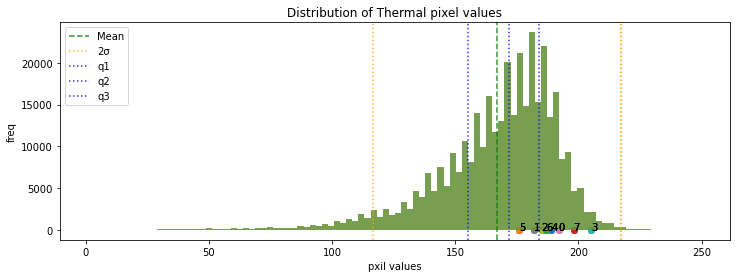

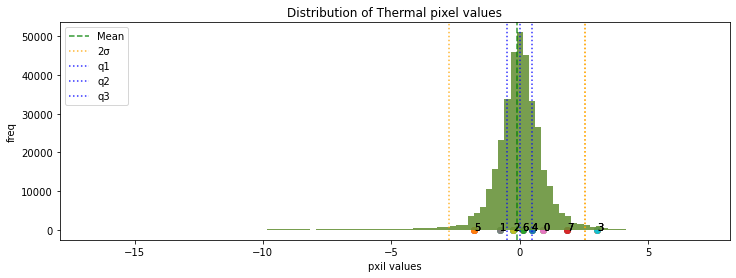

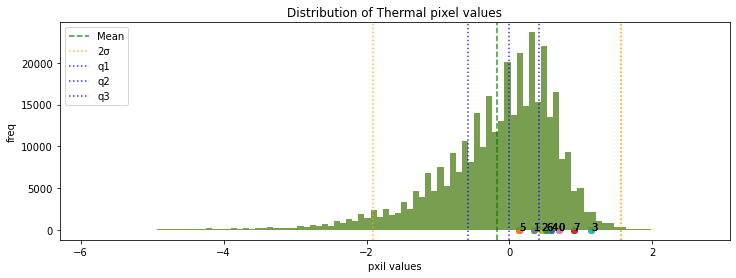

1347.jpg Single-Hotspot


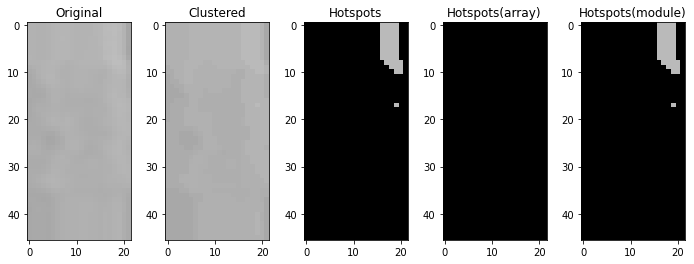

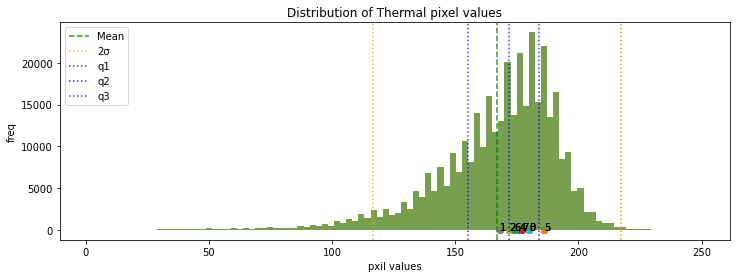

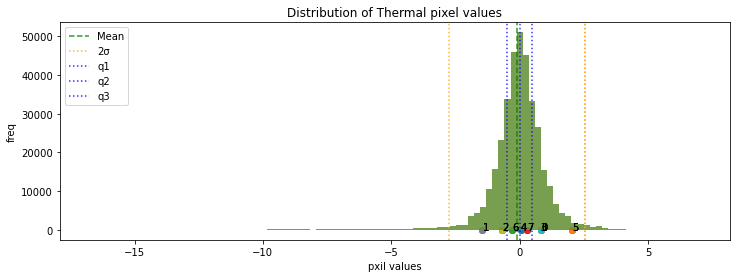

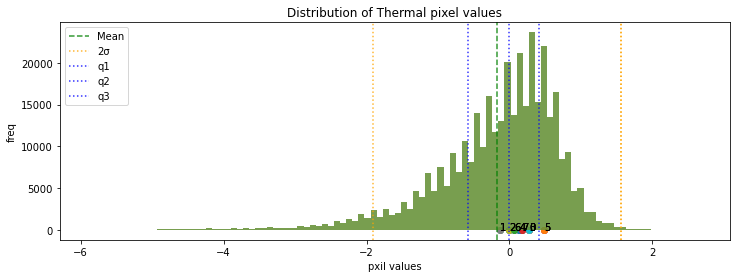

162.jpg Single-Hotspot


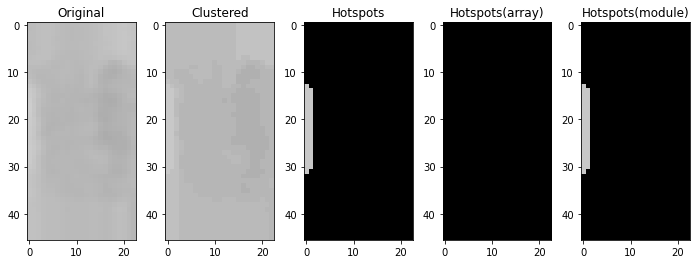

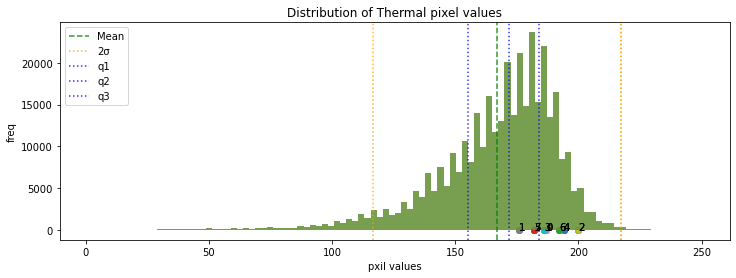

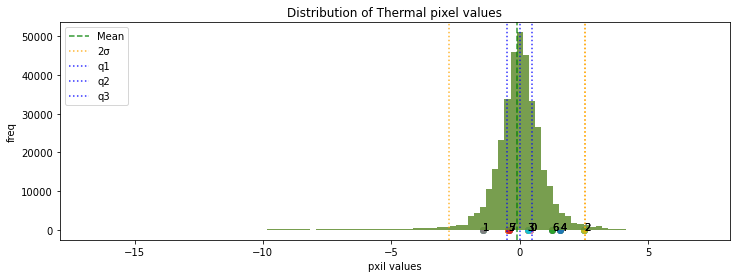

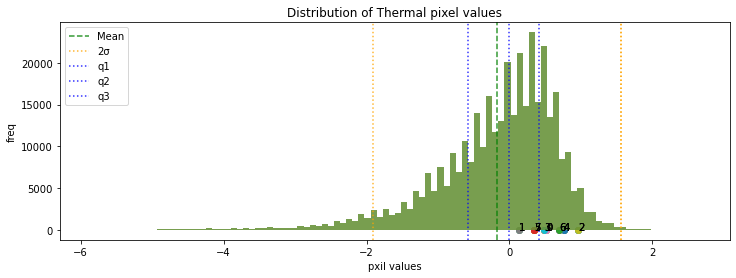

1384.jpg Single-Hotspot


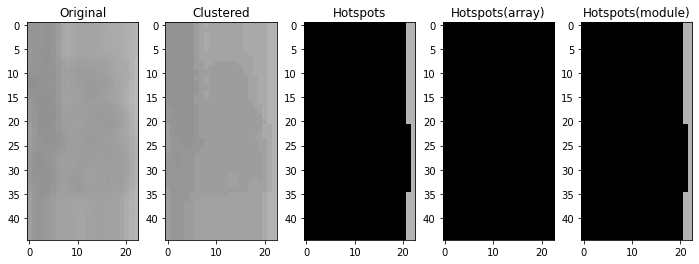

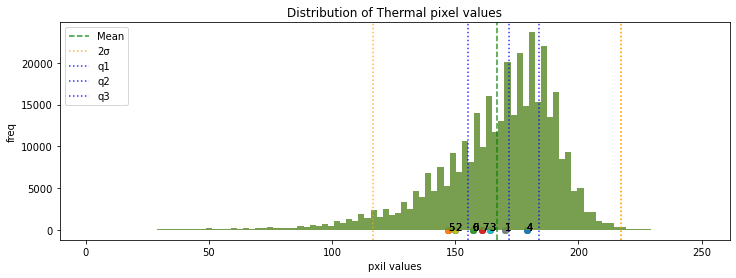

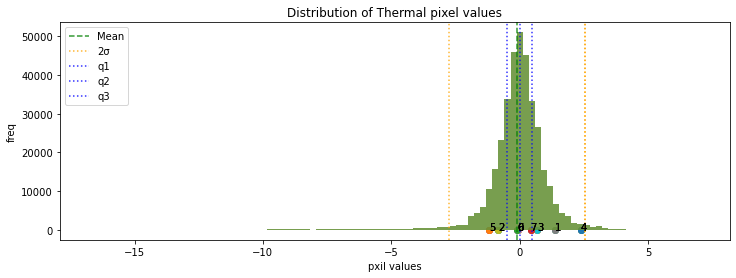

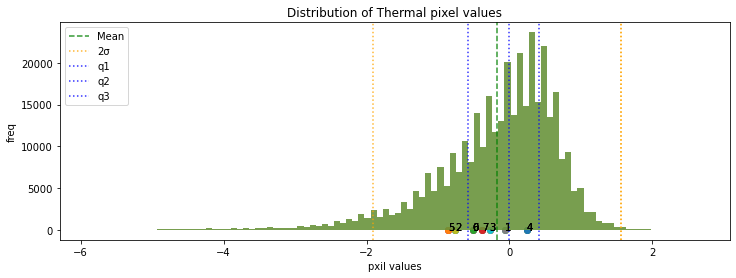

1186.jpg Single-Hotspot


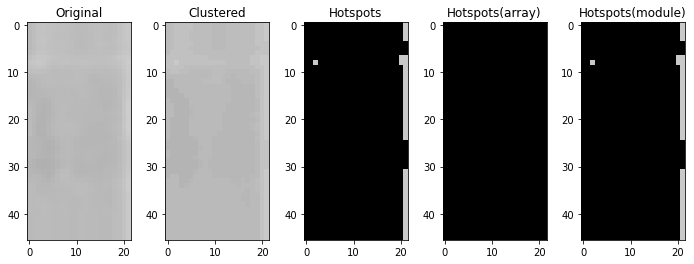

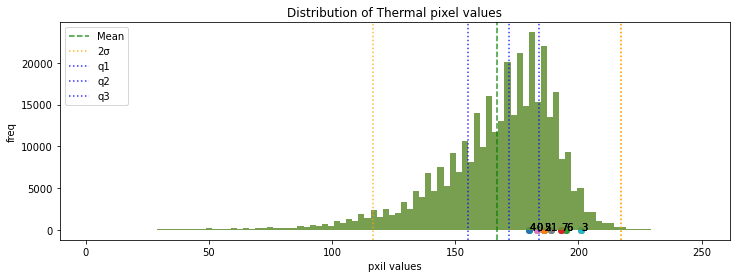

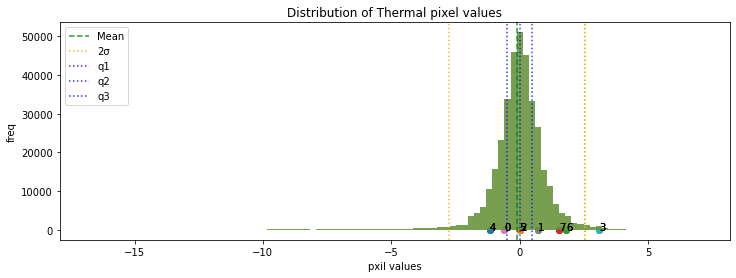

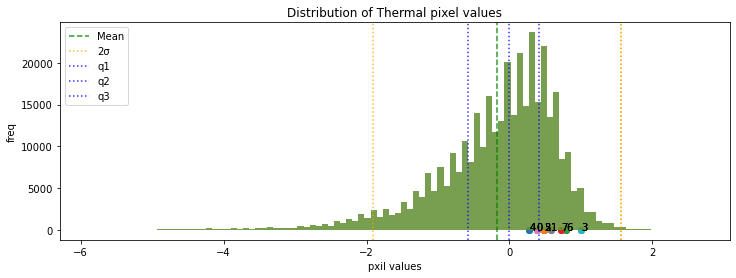

1025.jpg Single-Hotspot


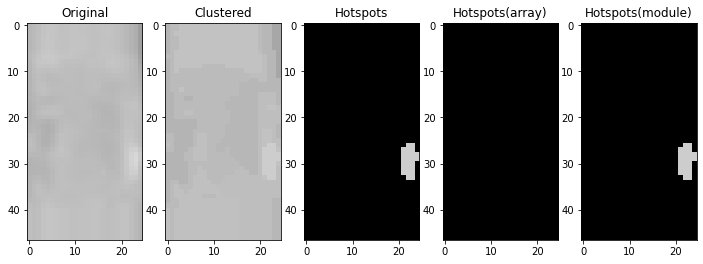

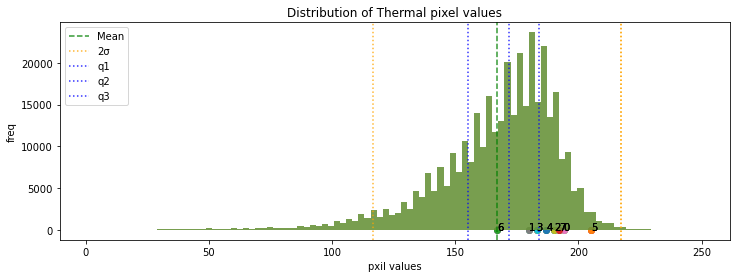

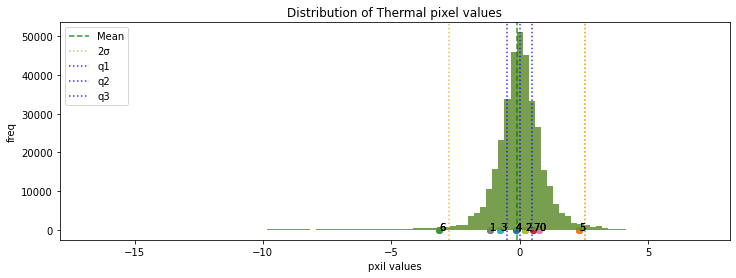

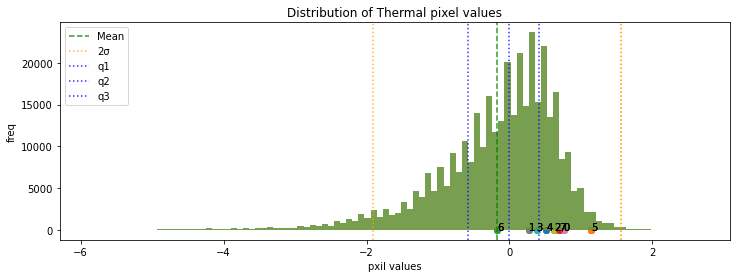

228.jpg Single-Hotspot


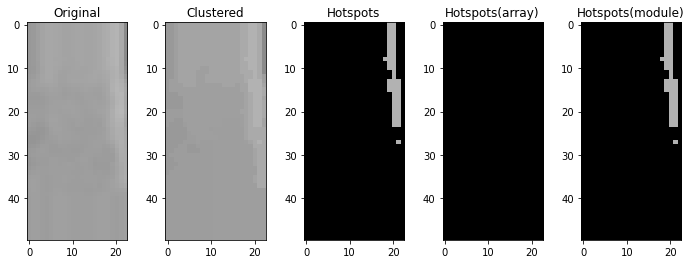

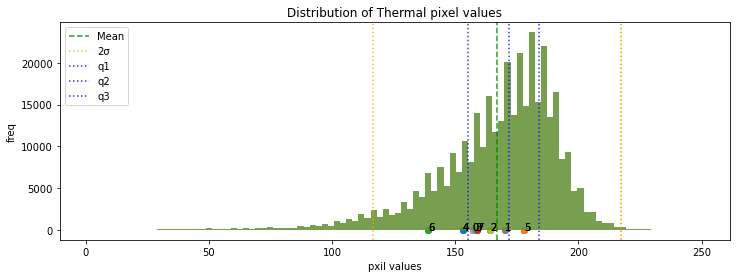

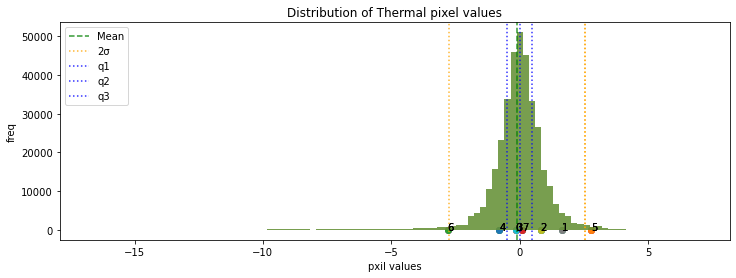

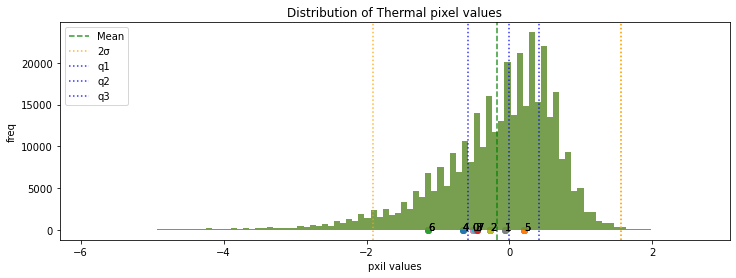

1970.jpg Multi-Hotspots


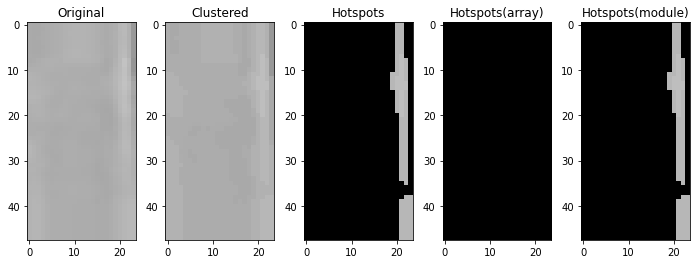

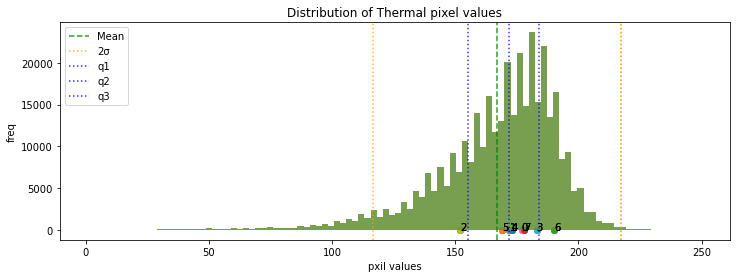

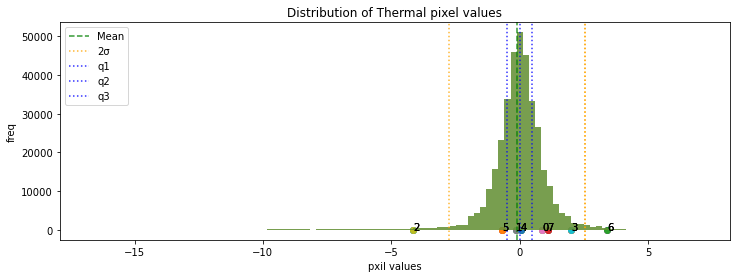

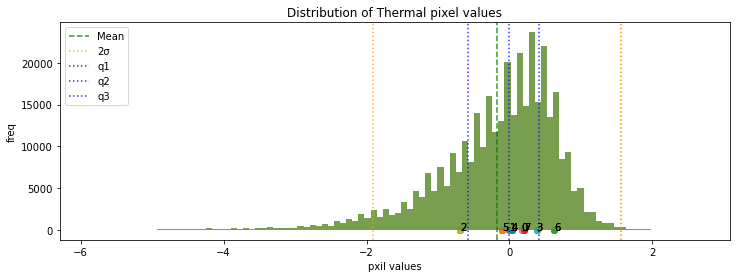

572.jpg Single-Hotspot


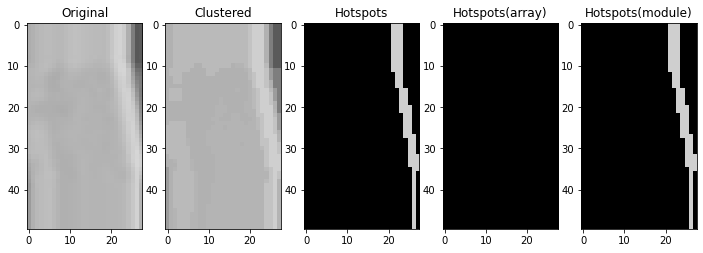

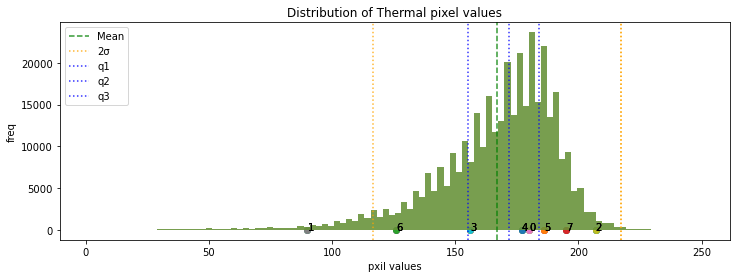

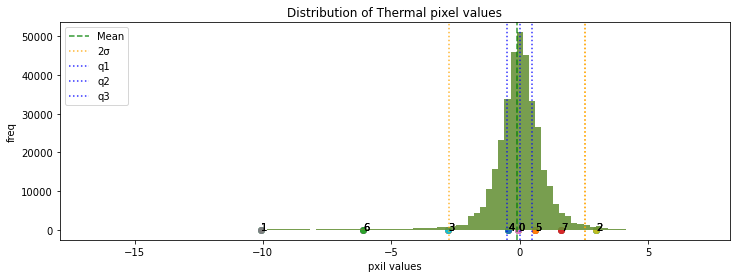

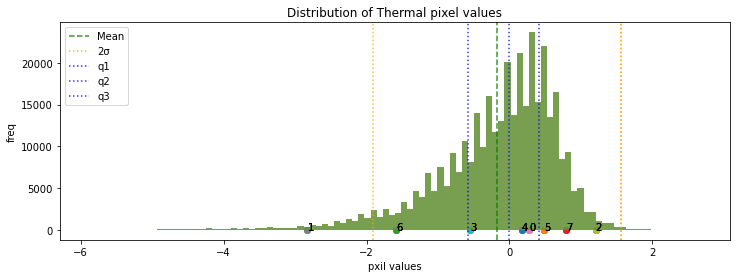

566.jpg Single-Hotspot


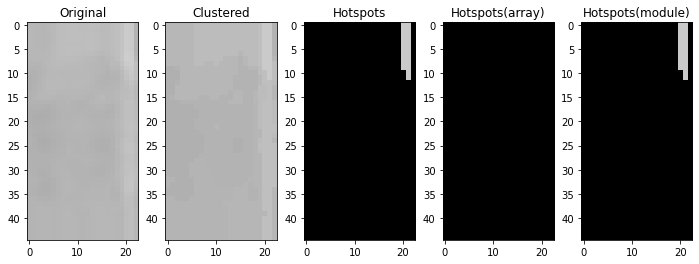

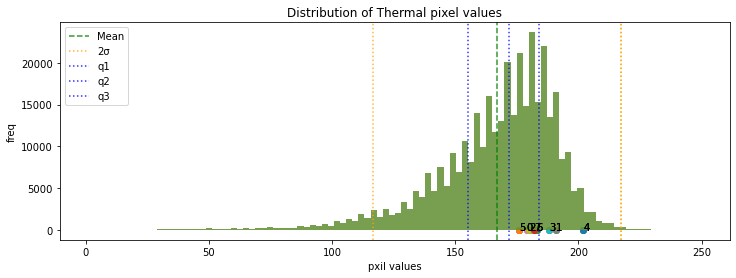

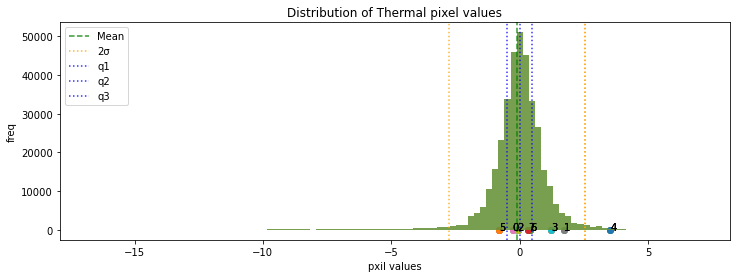

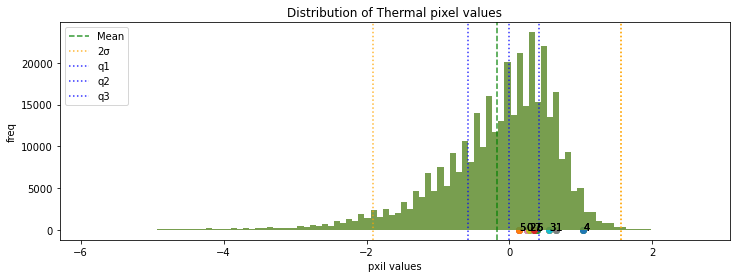

1794.jpg Single-Hotspot


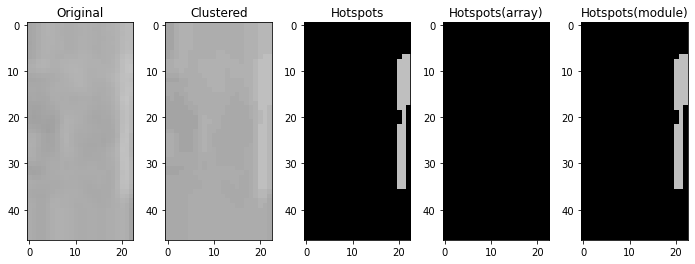

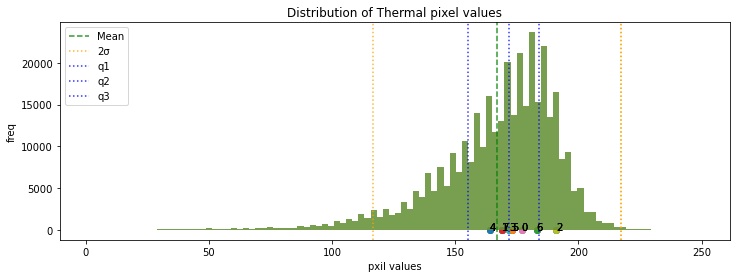

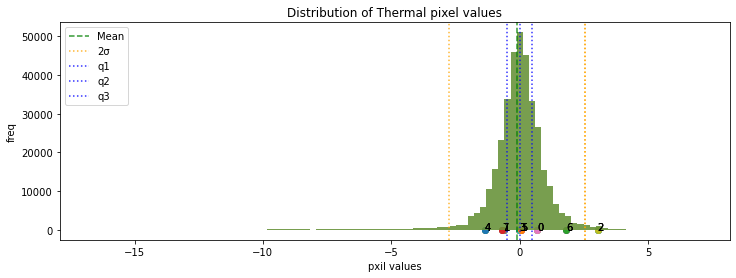

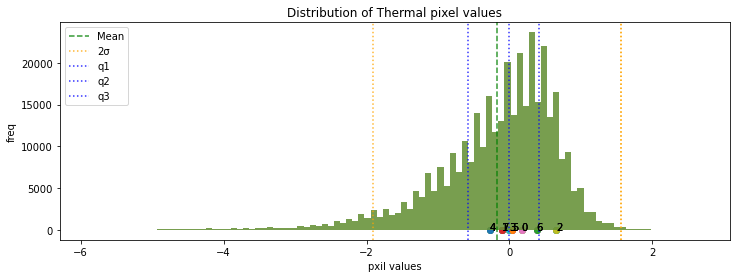

957.jpg Single-Hotspot


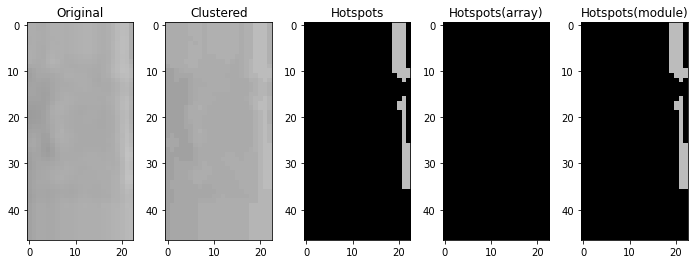

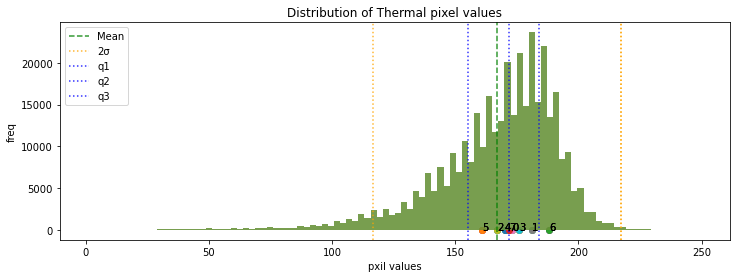

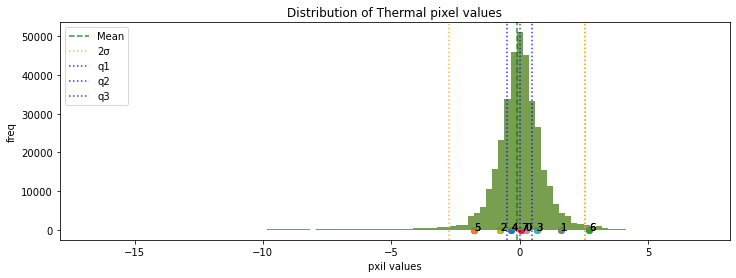

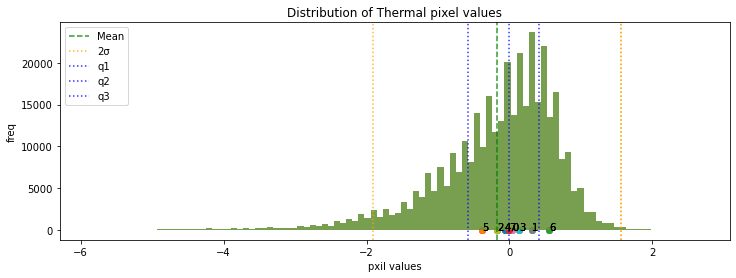

1569.jpg Single-Hotspot


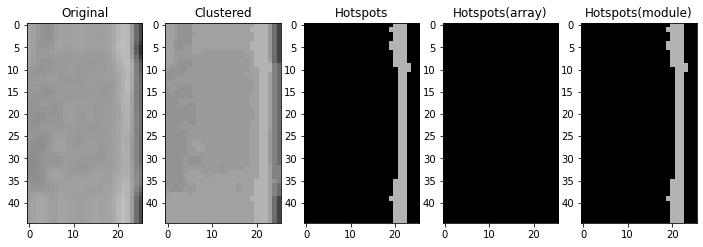

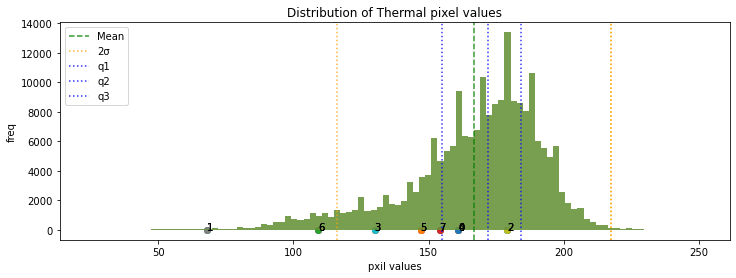

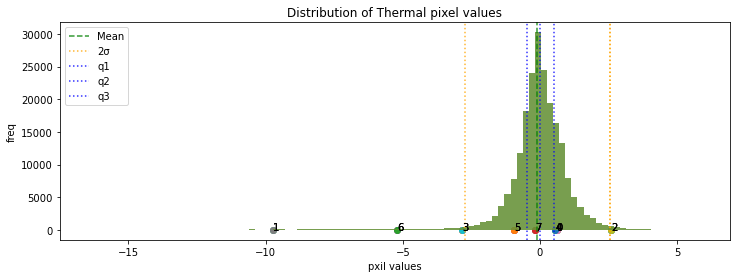

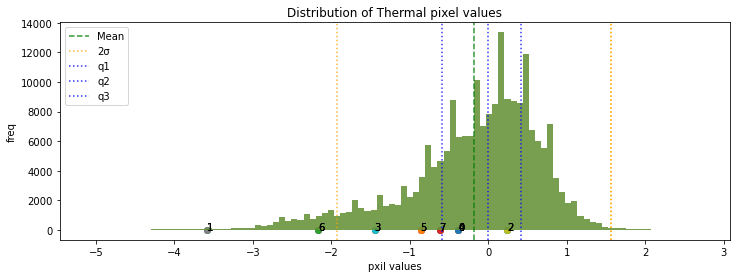

1541.jpg Single-Hotspot


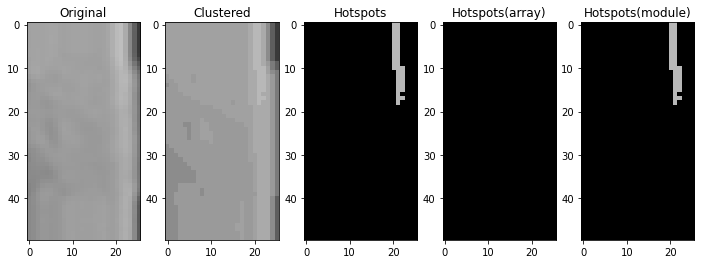

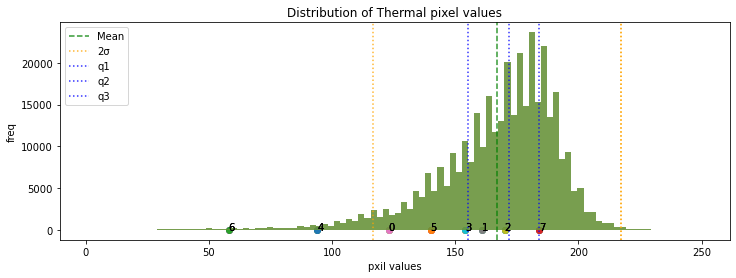

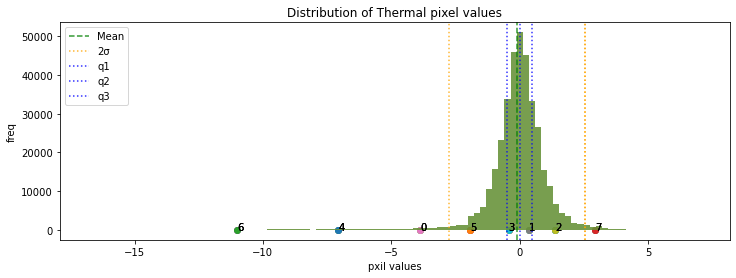

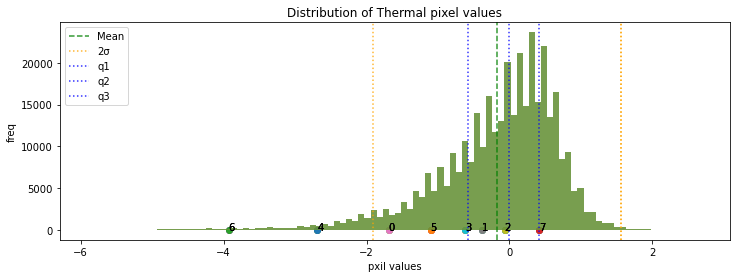

2048.jpg Single-Hotspot


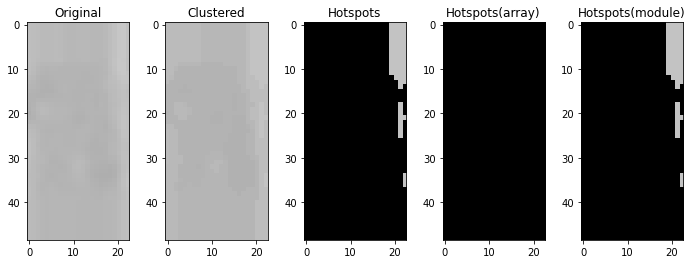

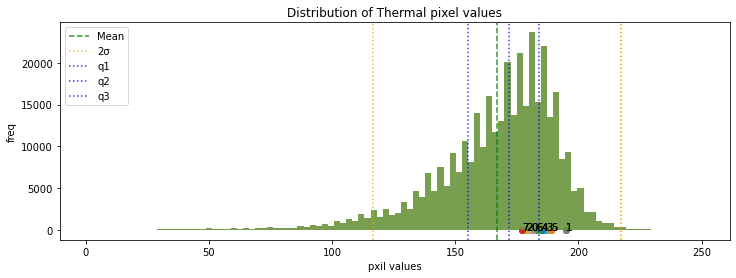

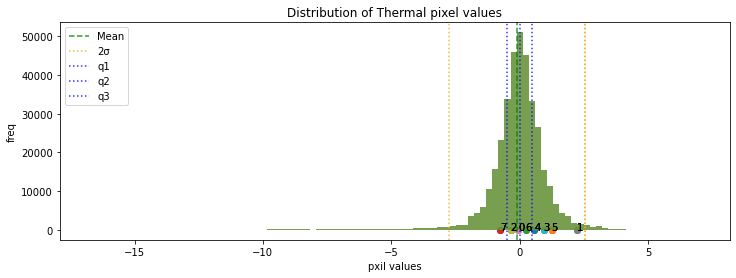

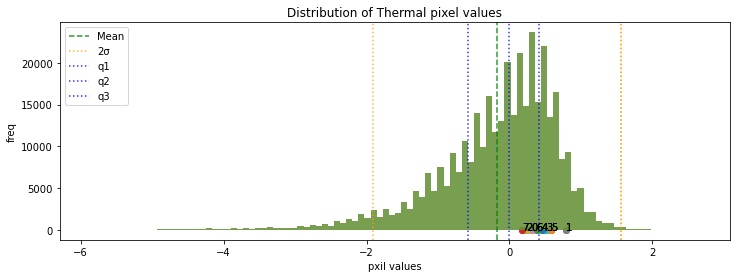

1233.jpg Multi-Hotspots


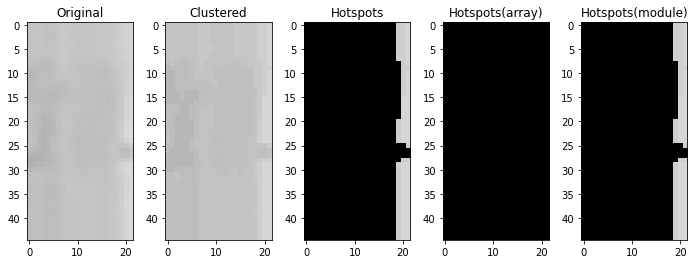

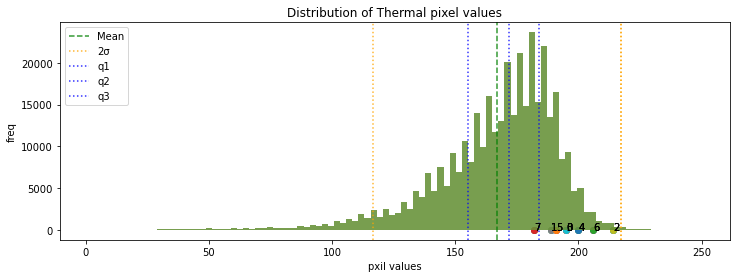

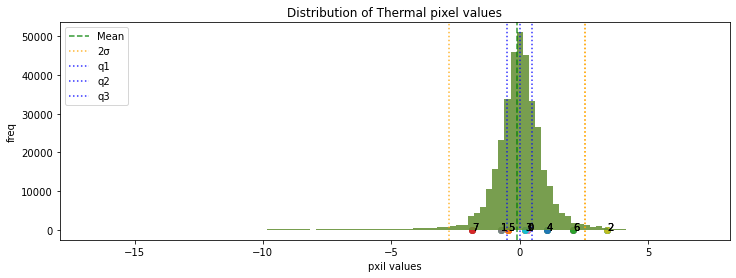

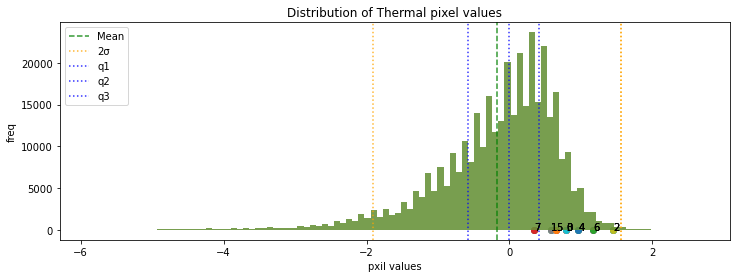

1582.jpg Single-Hotspot


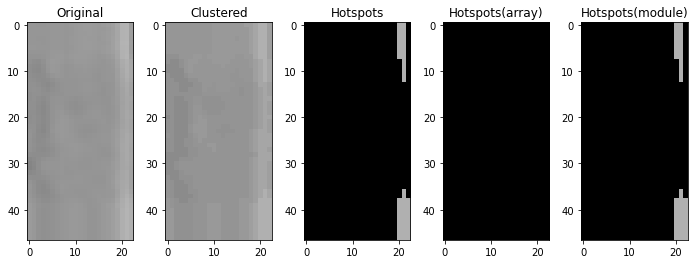

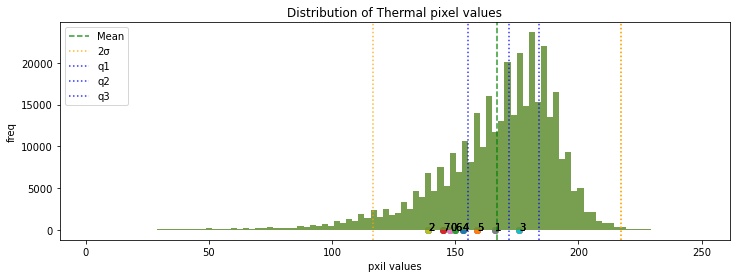

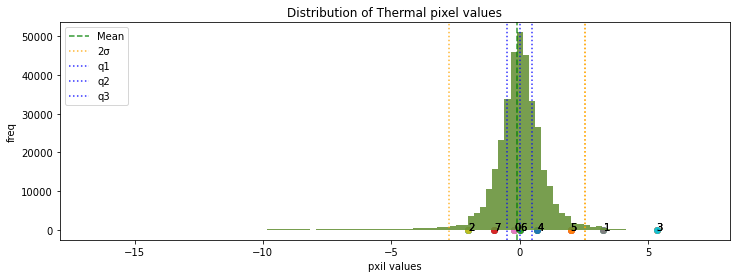

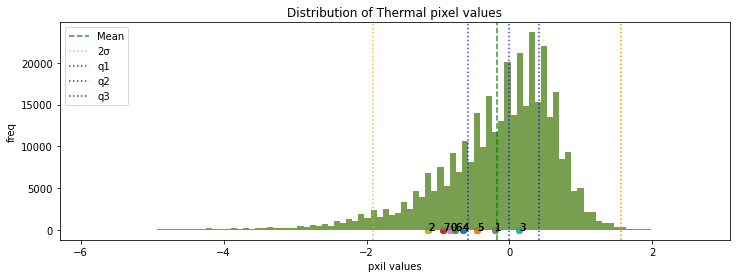

771.jpg Single-Hotspot


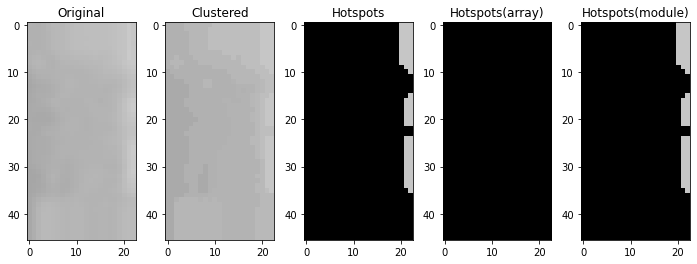

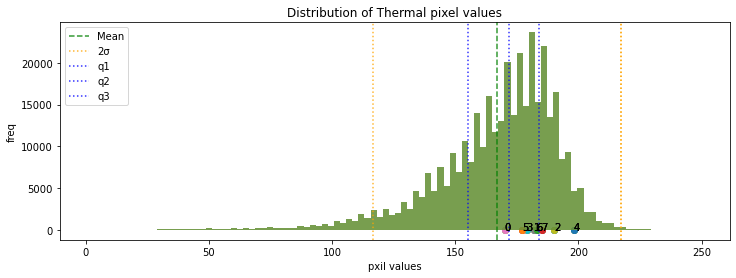

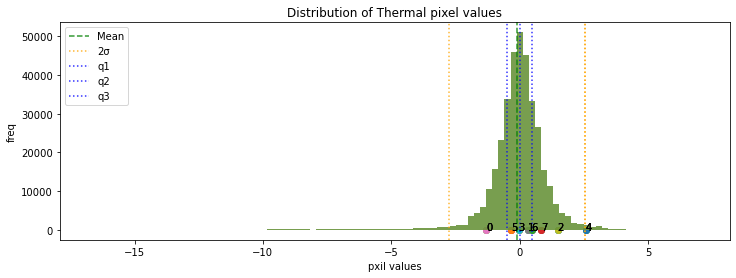

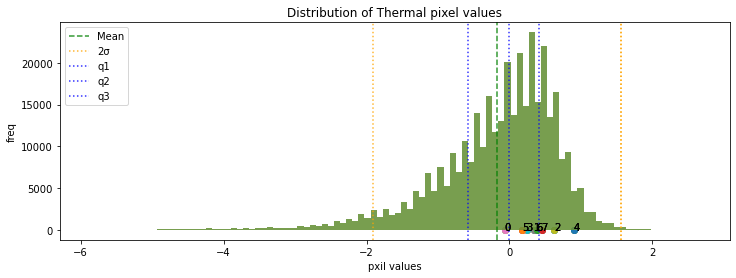

995.jpg Single-Hotspot


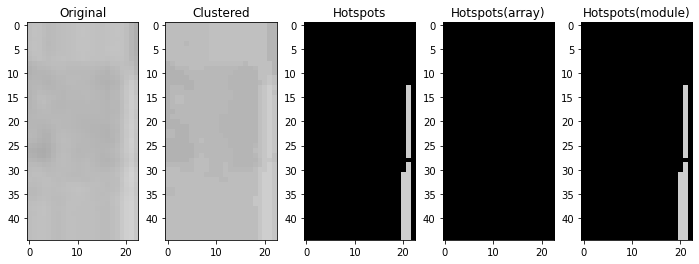

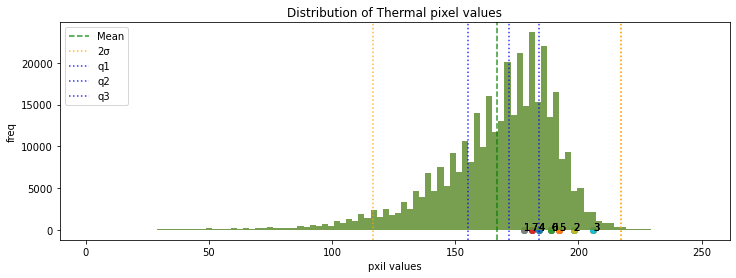

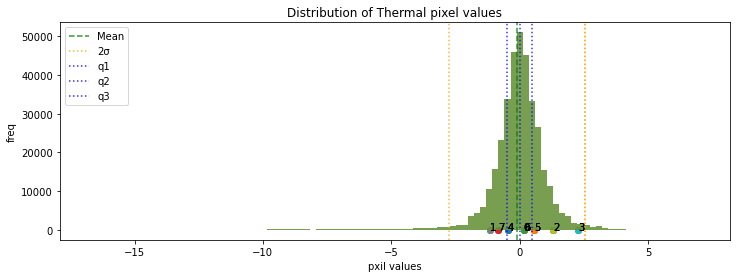

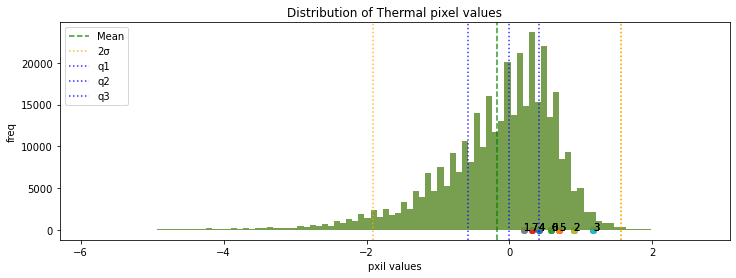

1226.jpg Single-Hotspot


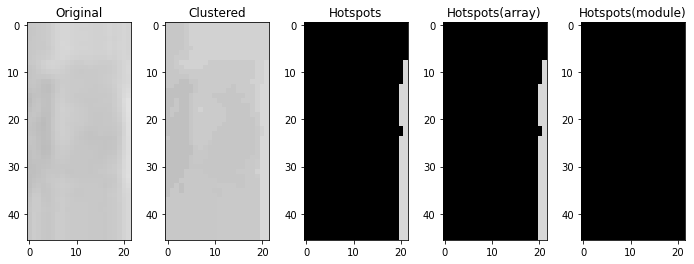

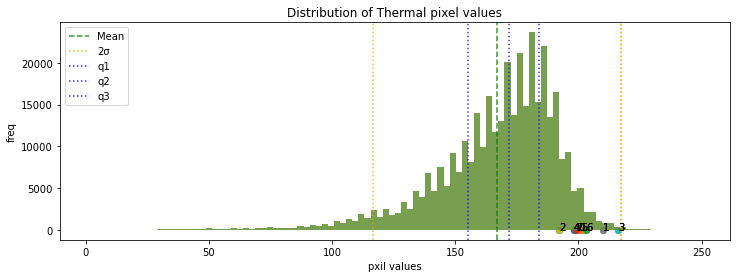

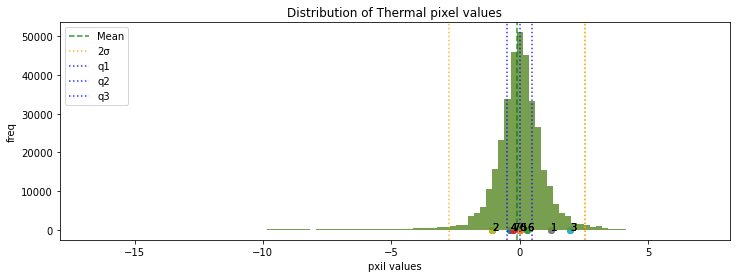

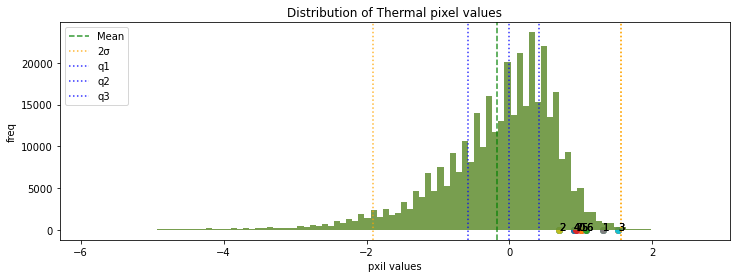

567.jpg Single-Hotspot


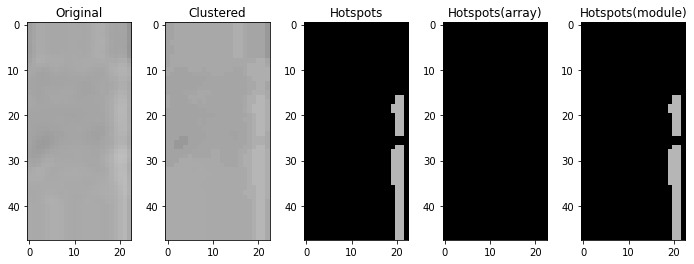

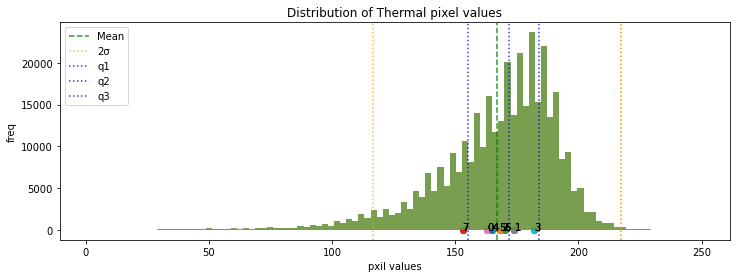

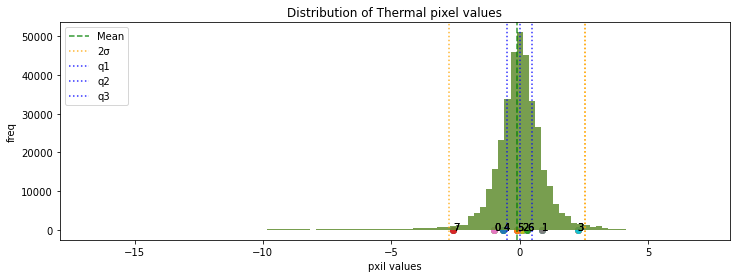

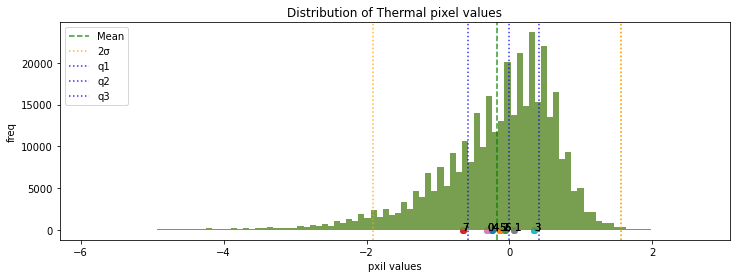

1795.jpg Single-Hotspot


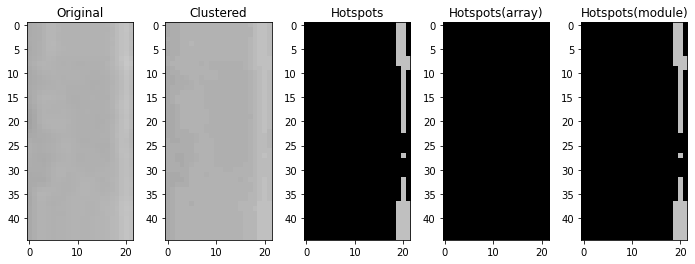

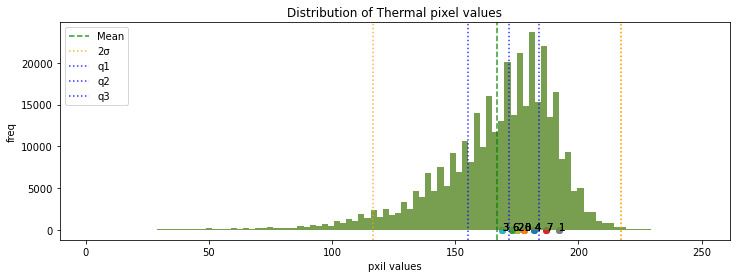

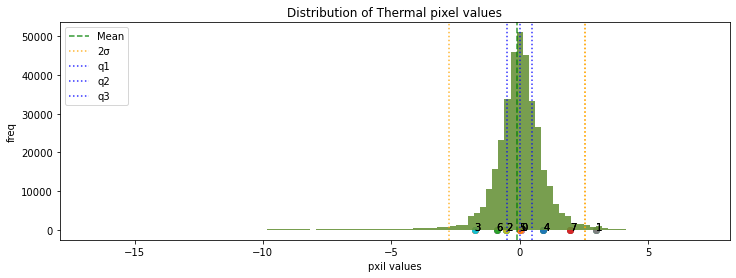

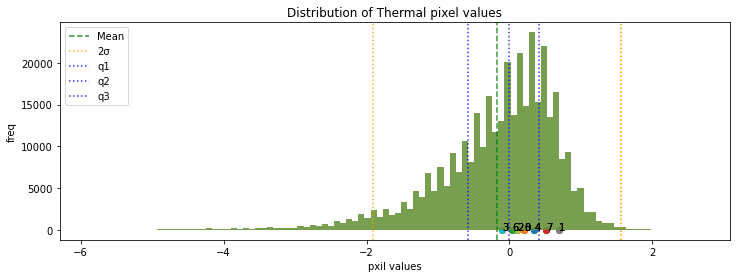

215.jpg Single-Hotspot


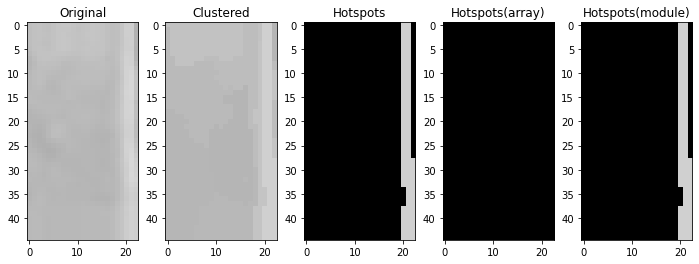

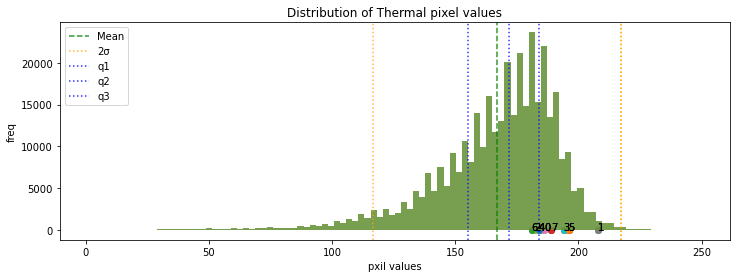

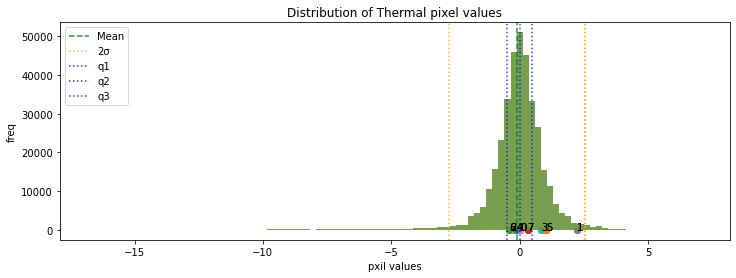

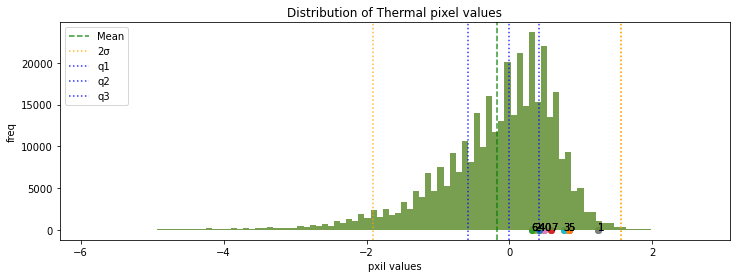

573.jpg Single-Hotspot


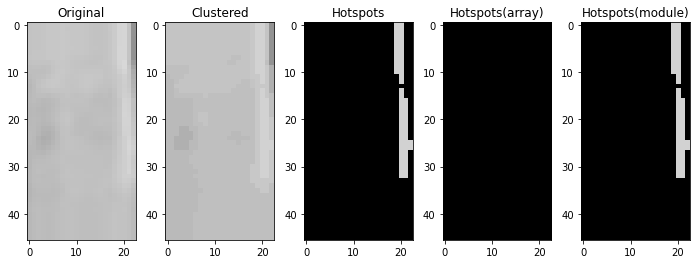

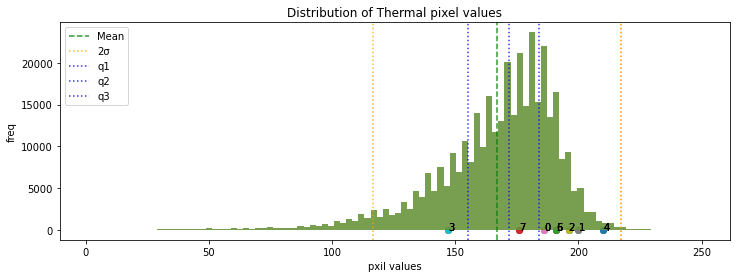

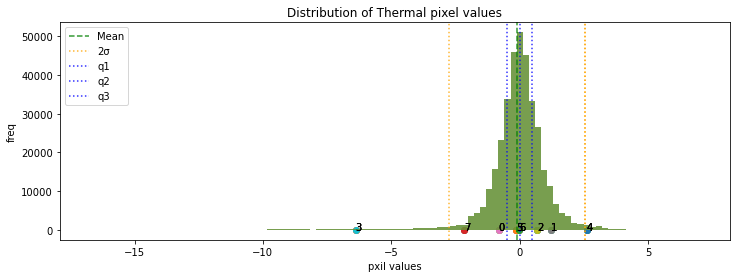

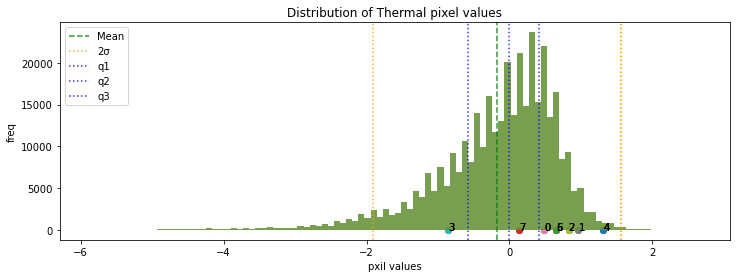

1030.jpg Multi-Hotspots


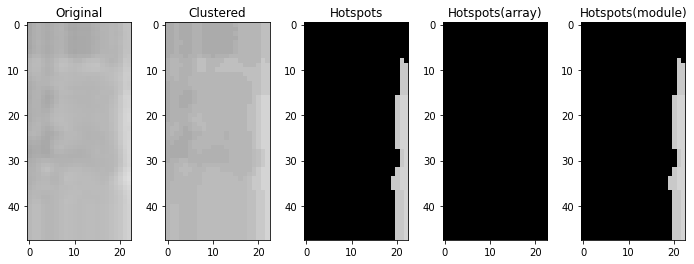

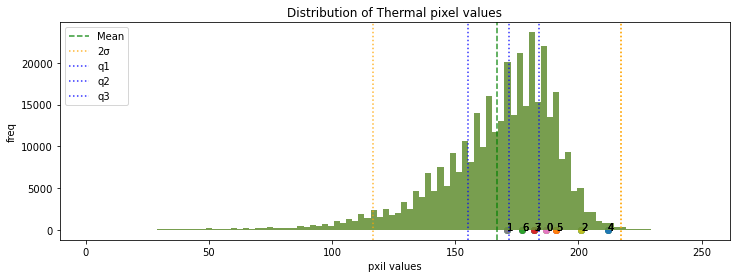

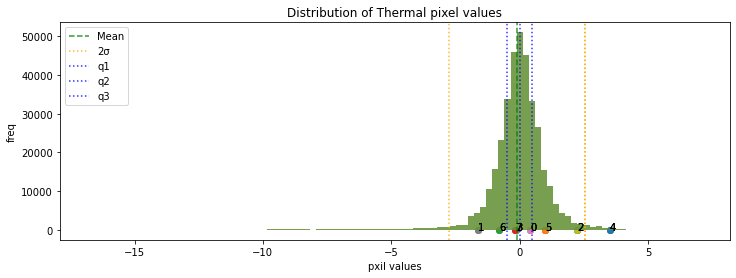

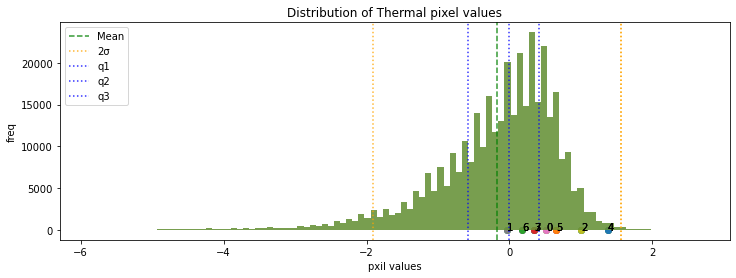

598.jpg Single-Hotspot


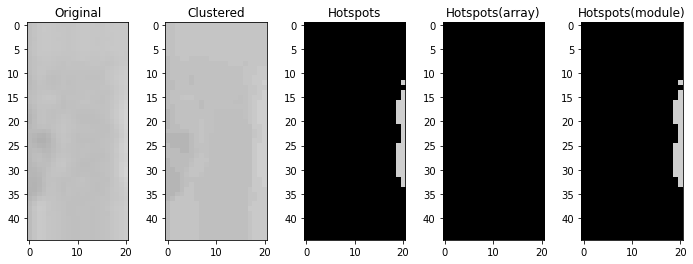

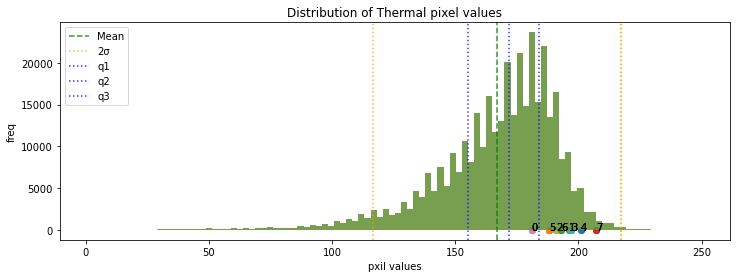

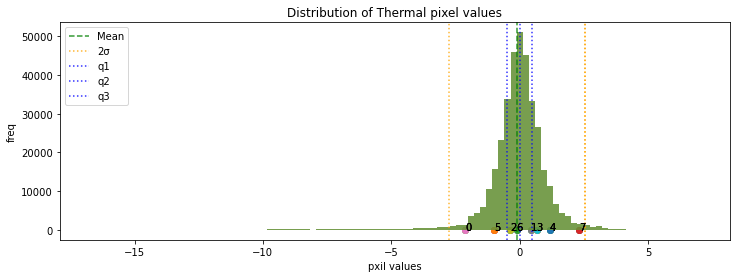

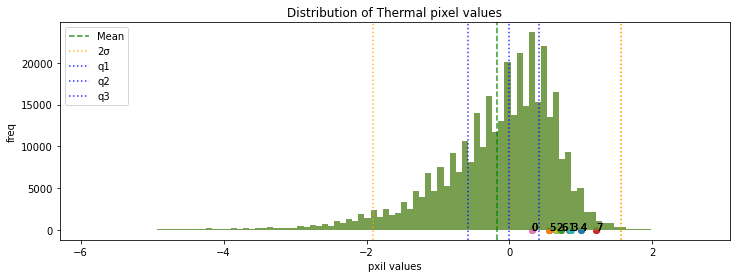

361.jpg Single-Hotspot


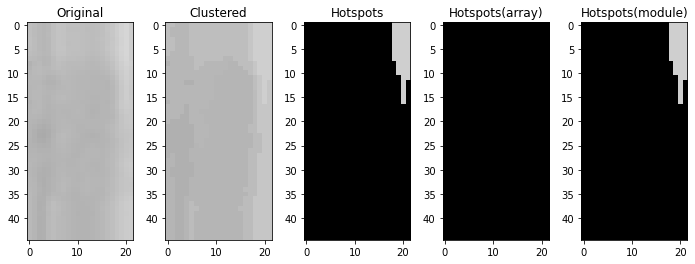

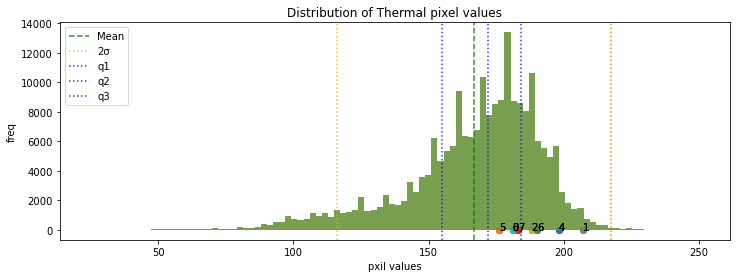

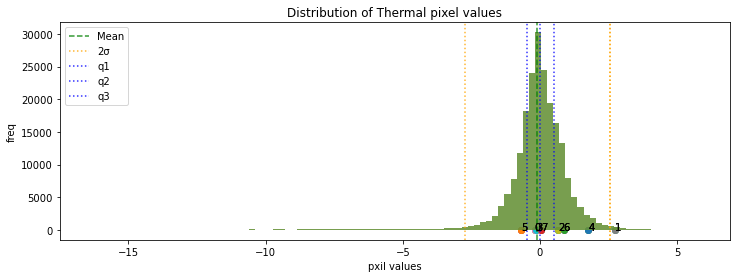

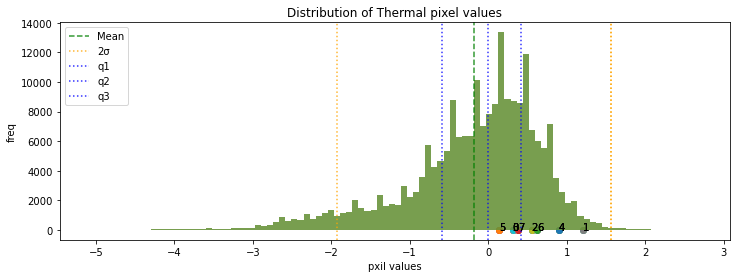

1805.jpg Single-Hotspot


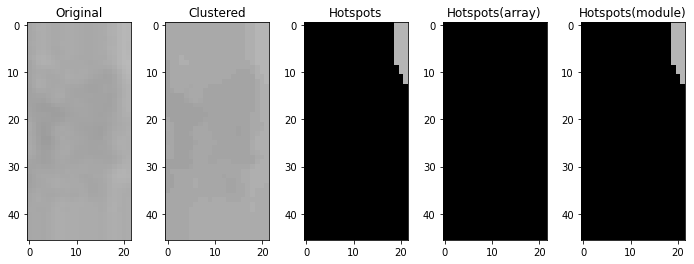

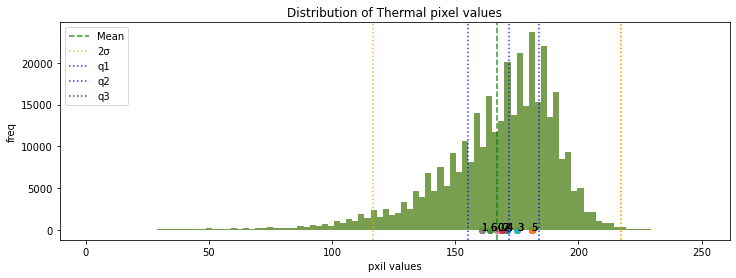

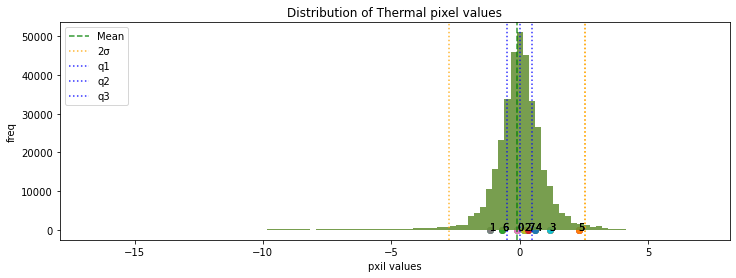

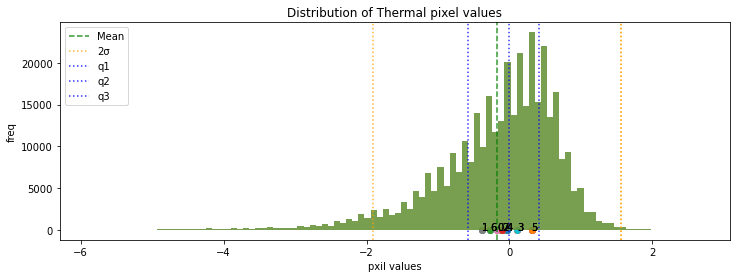

1144.jpg Single-Hotspot


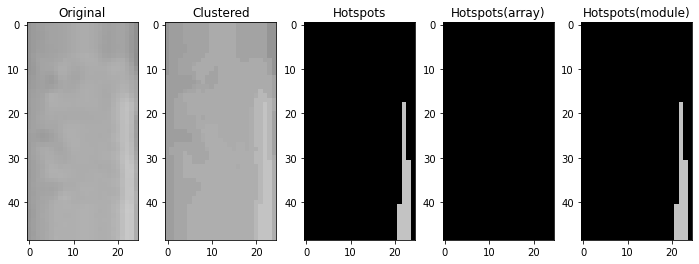

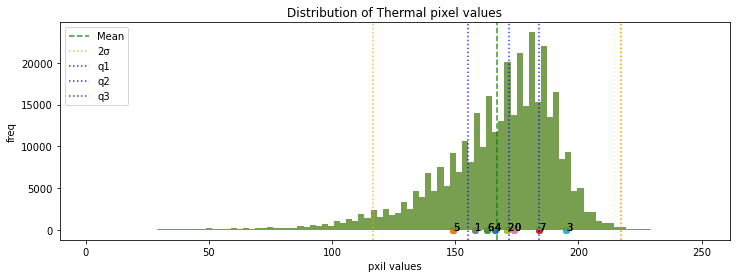

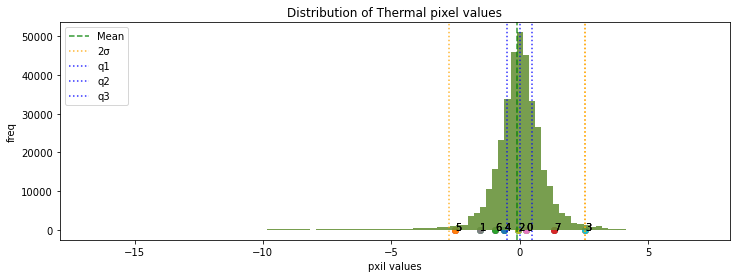

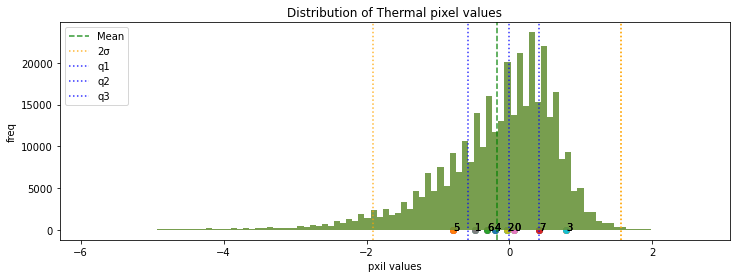

1150.jpg Multi-Hotspots


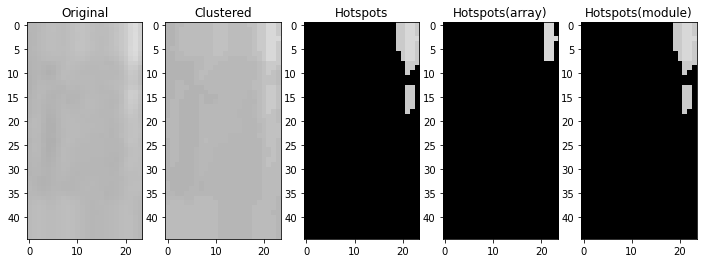

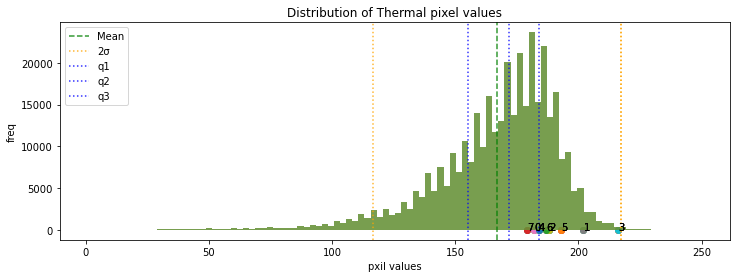

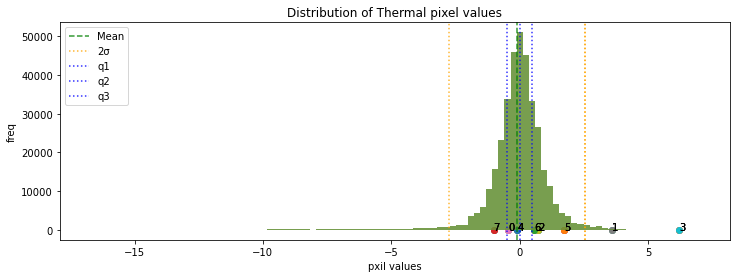

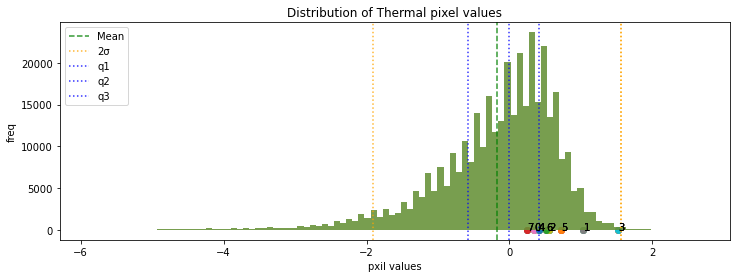

1178.jpg Single-Hotspot


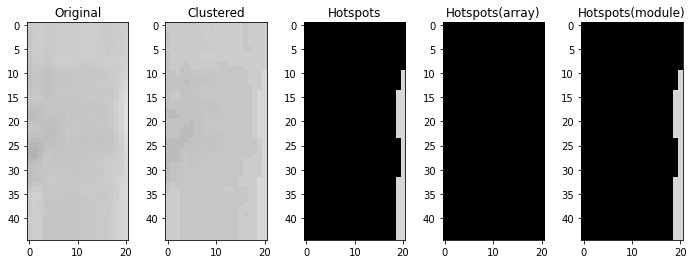

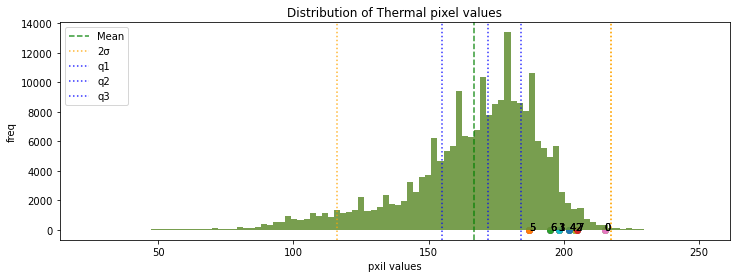

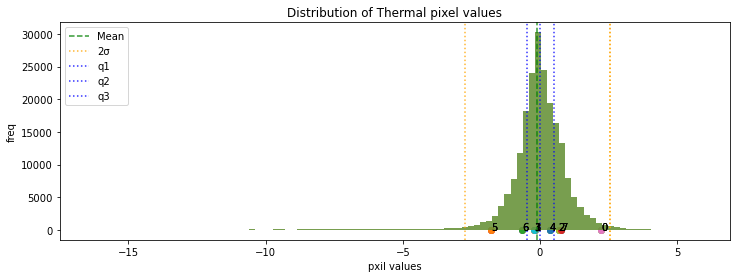

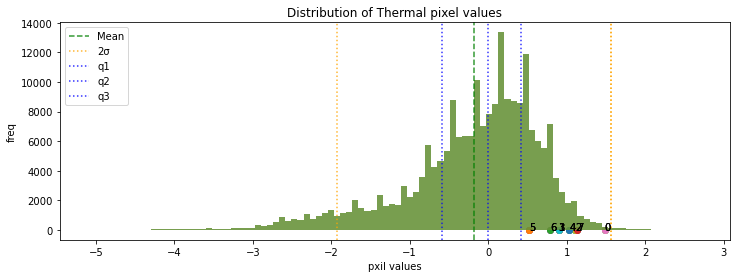

611.jpg Multi-Hotspots


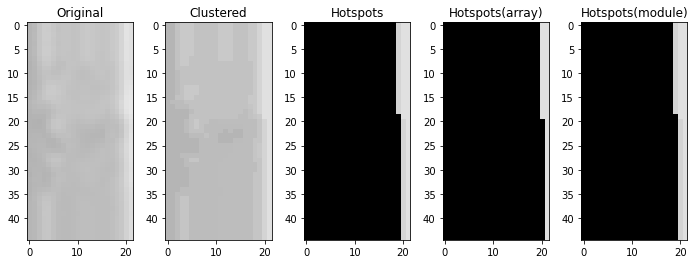

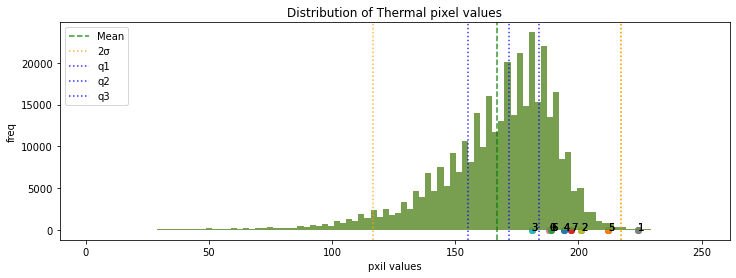

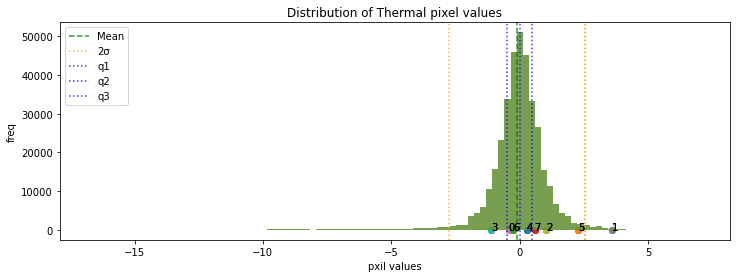

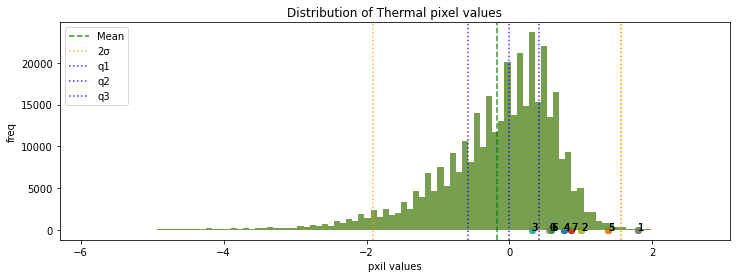

639.jpg Single-Hotspot


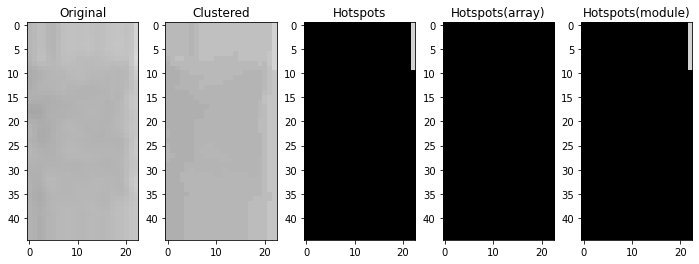

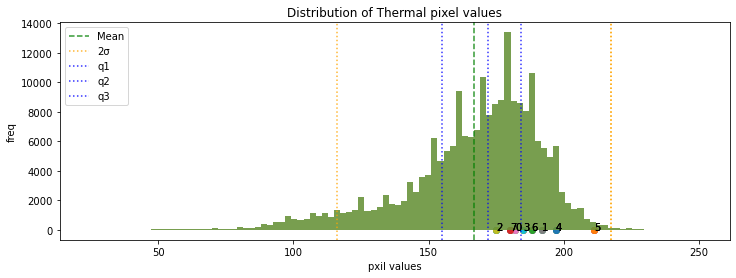

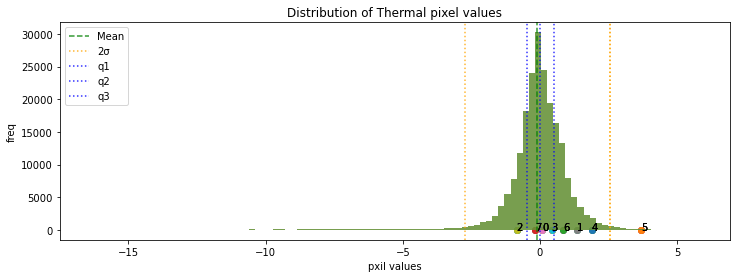

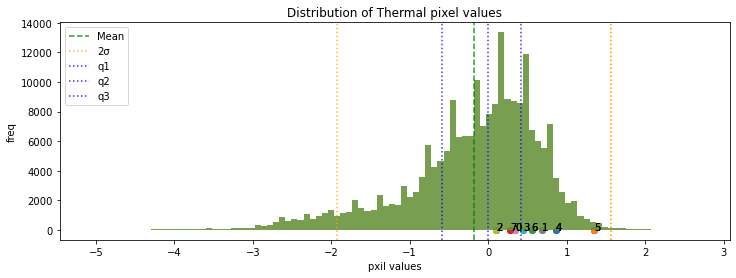

188.jpg Single-Hotspot


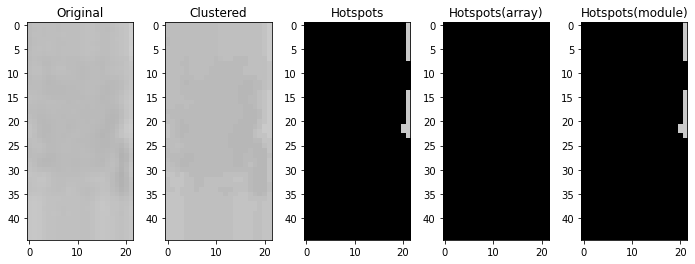

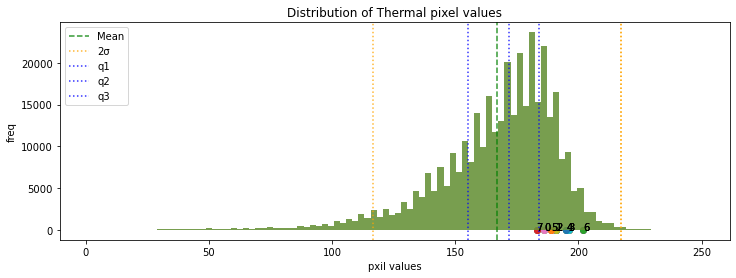

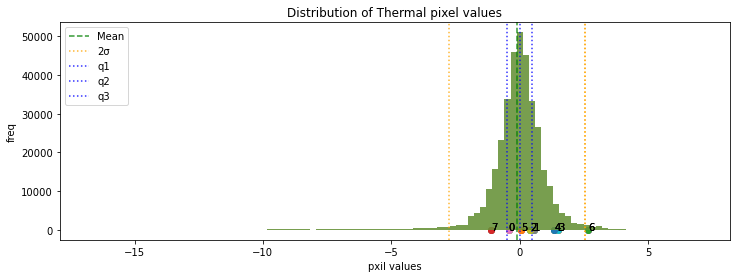

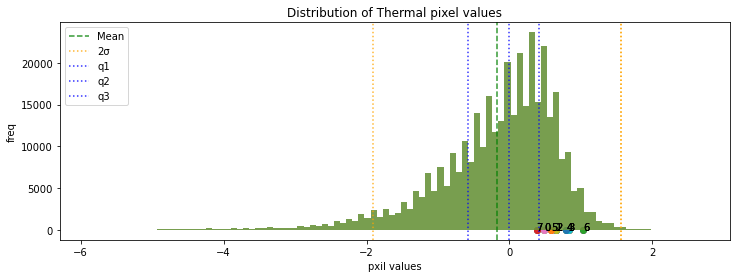

834.jpg Single-Hotspot


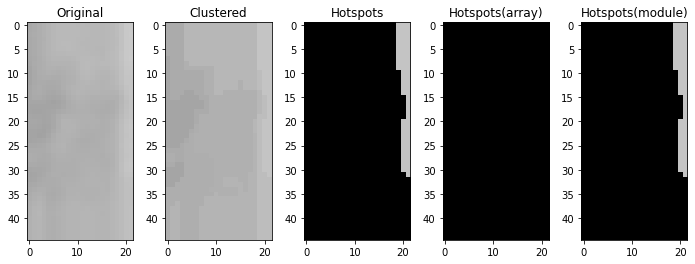

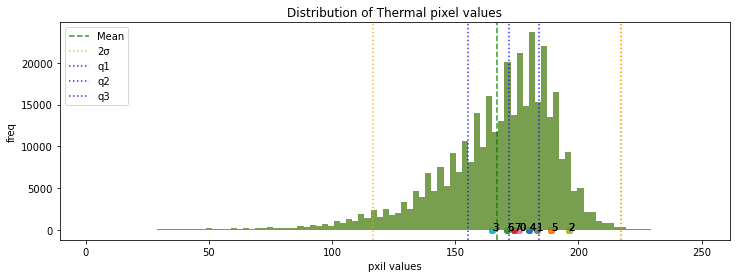

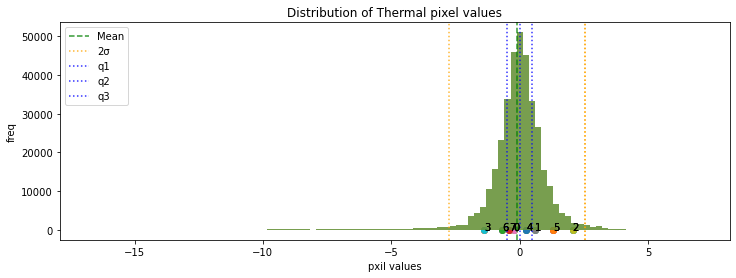

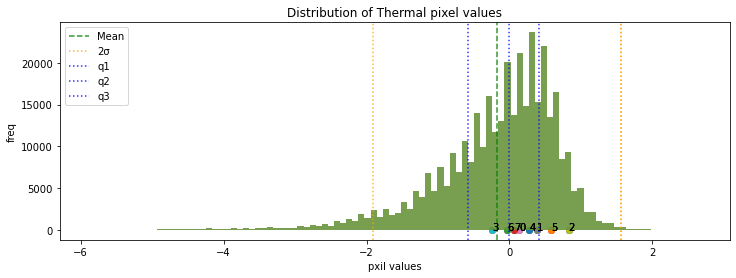

60.jpg Single-Hotspot


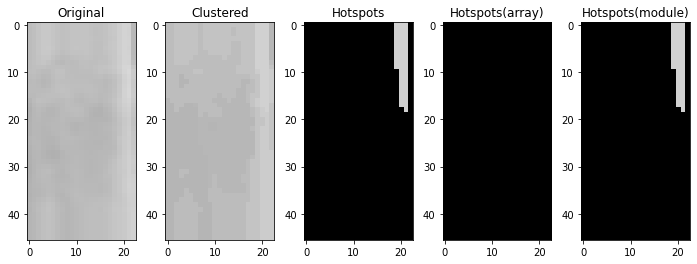

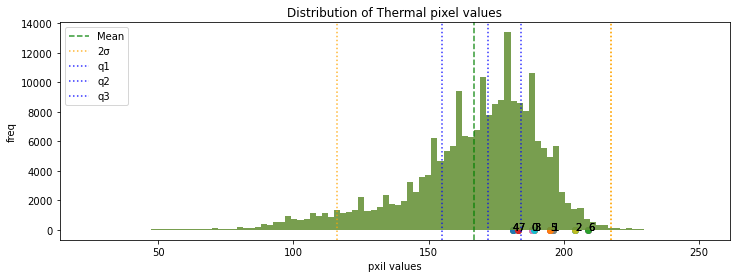

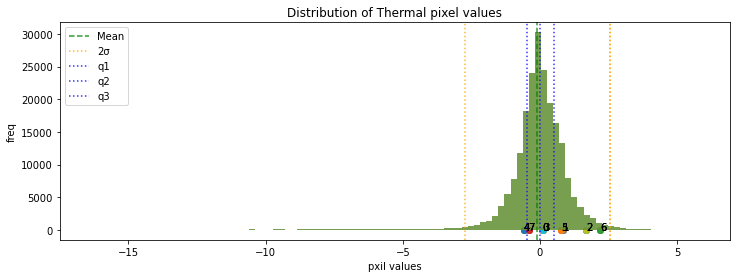

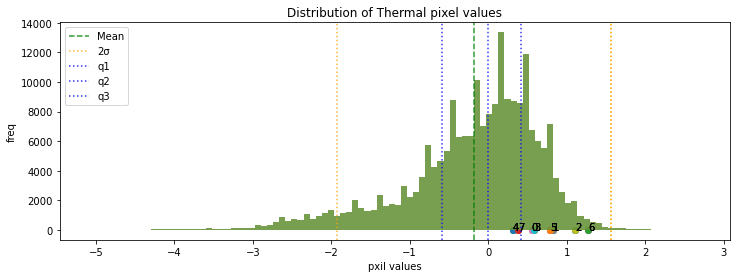

48.jpg Single-Hotspot


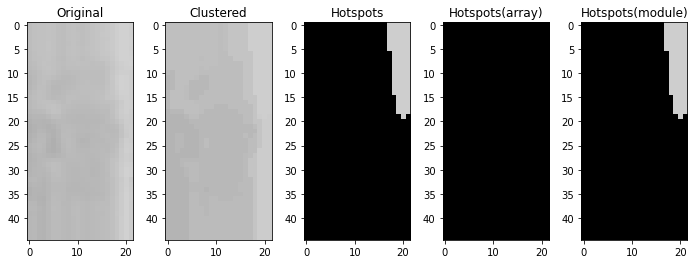

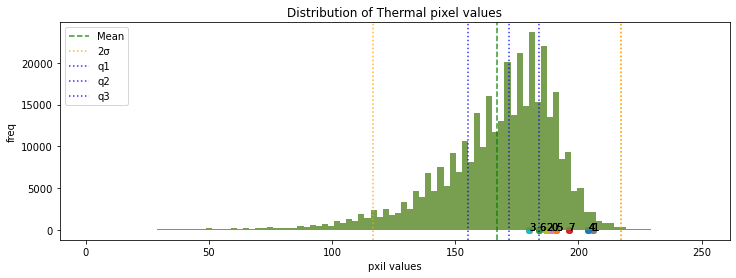

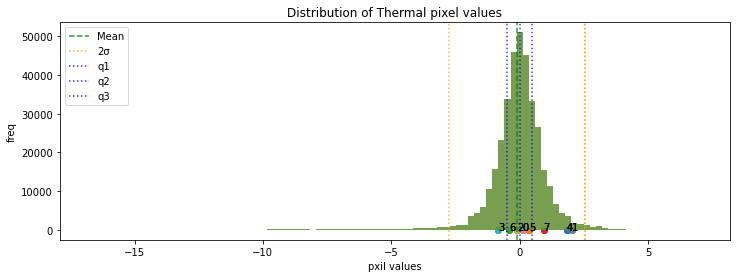

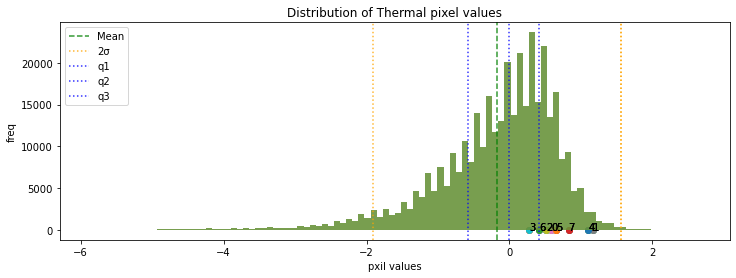

1436.jpg Multi-Hotspots


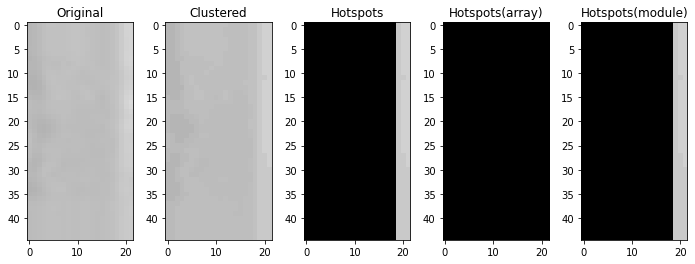

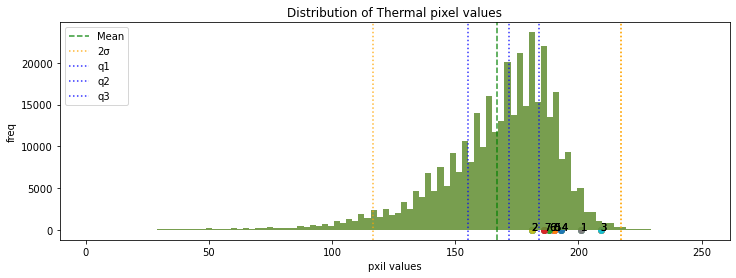

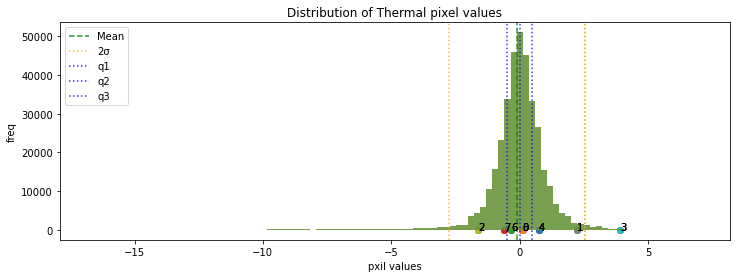

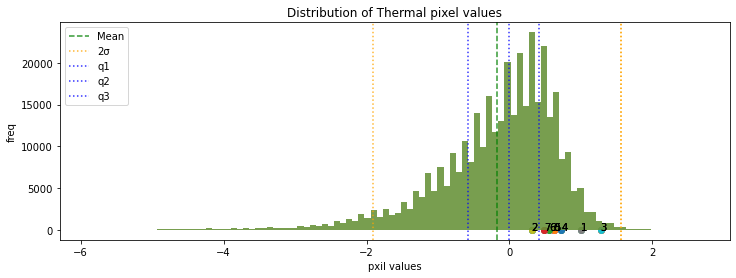

1350.jpg Multi-Hotspots


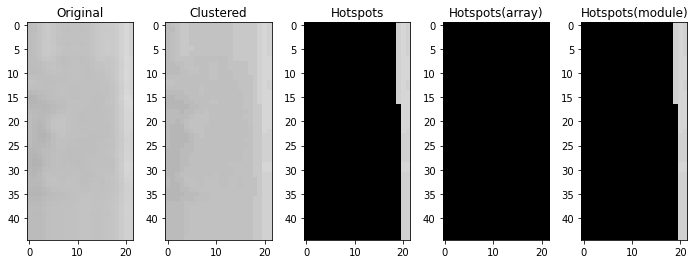

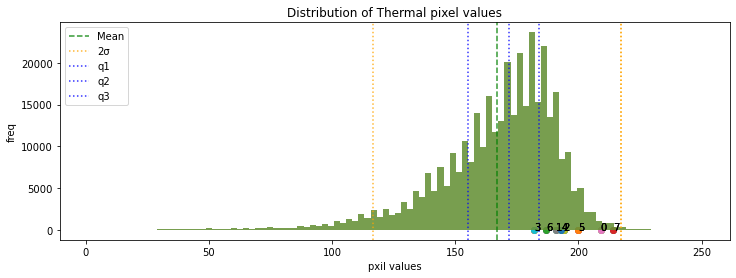

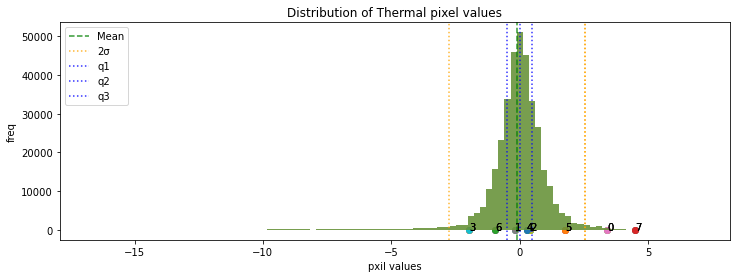

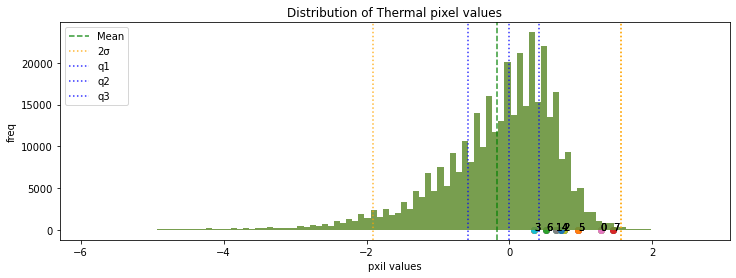

149.jpg Multi-Hotspots


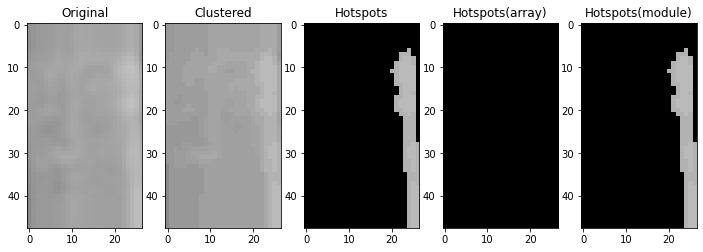

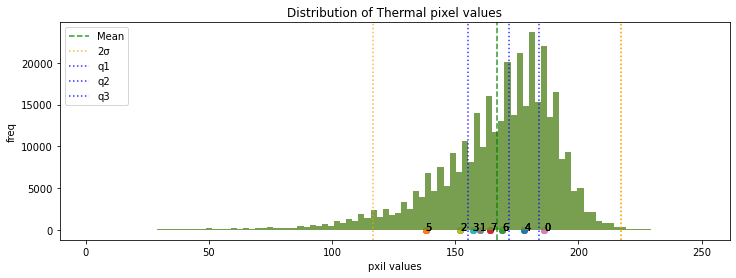

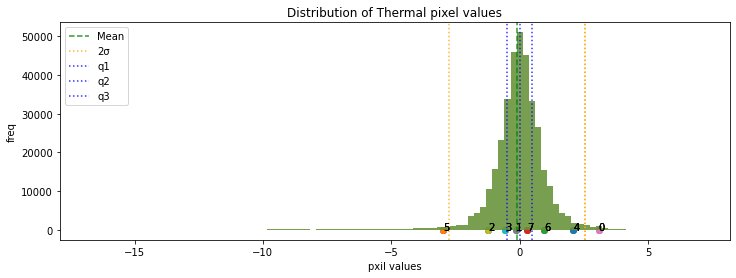

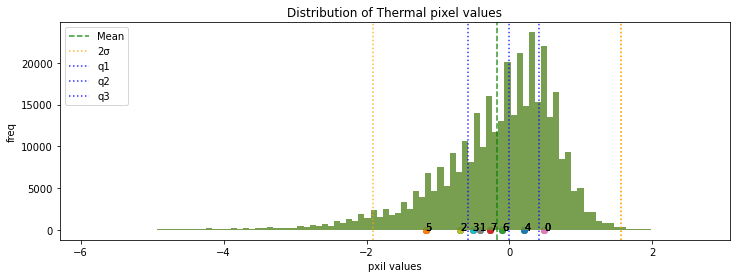

613.jpg Single-Hotspot


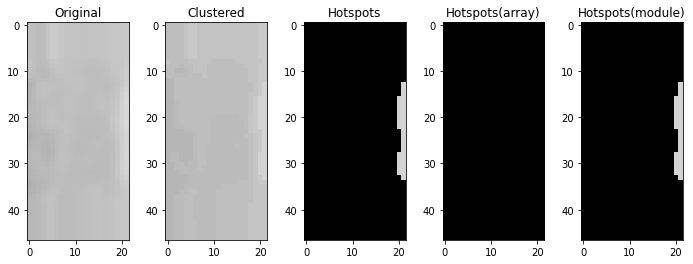

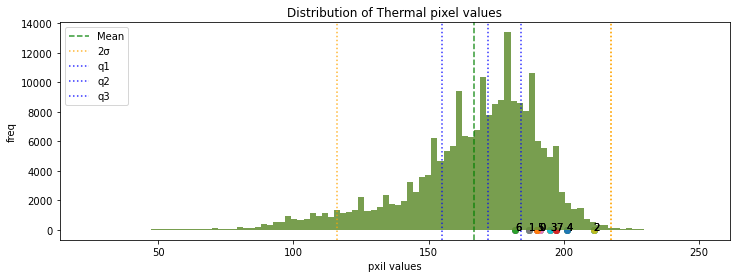

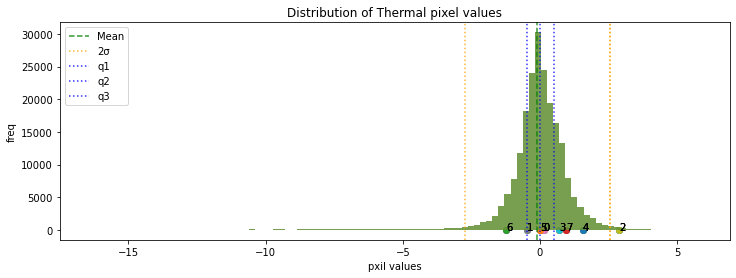

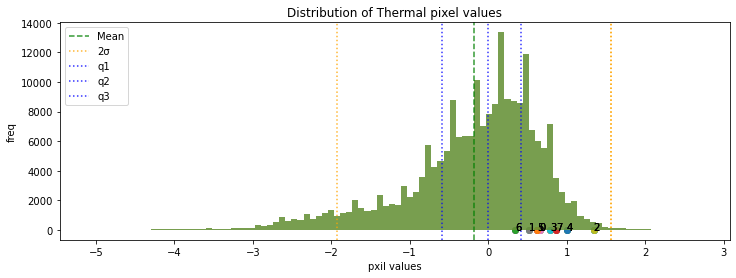

1393.jpg Single-Hotspot


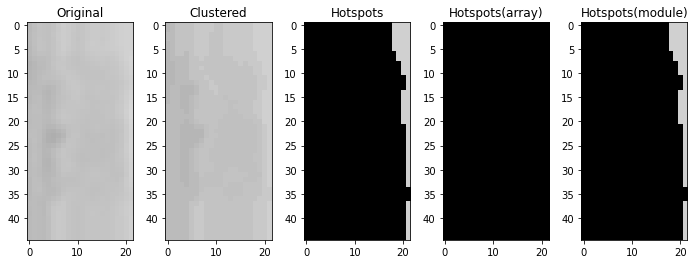

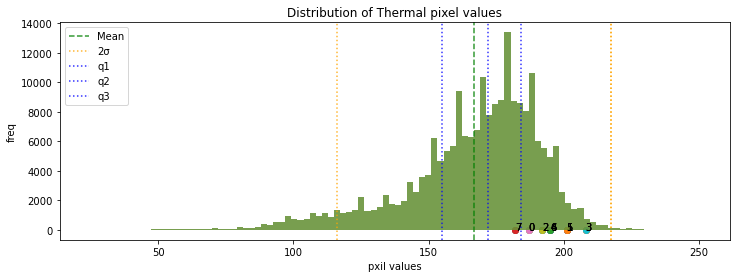

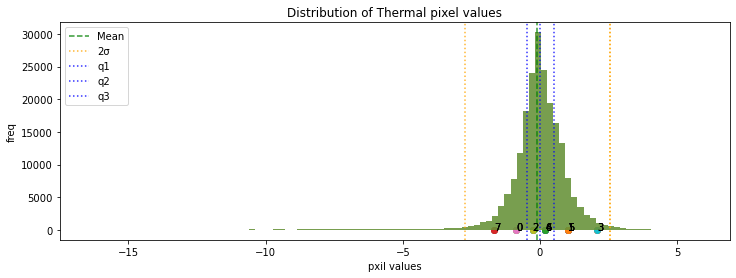

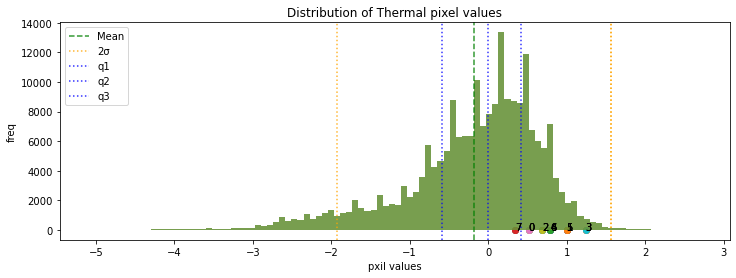

607.jpg Single-Hotspot


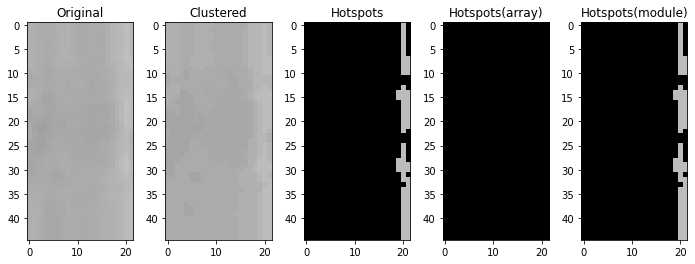

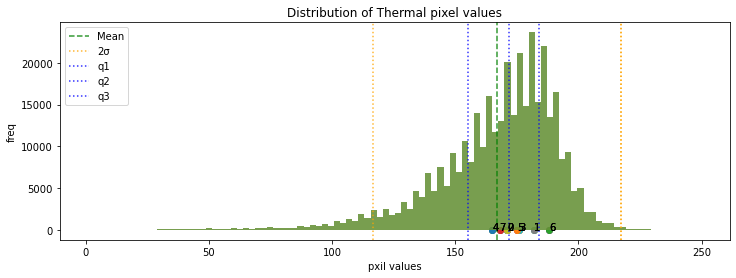

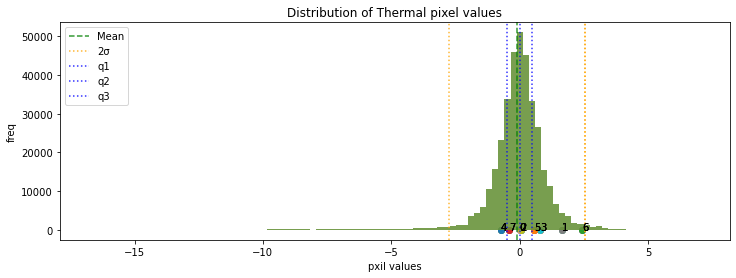

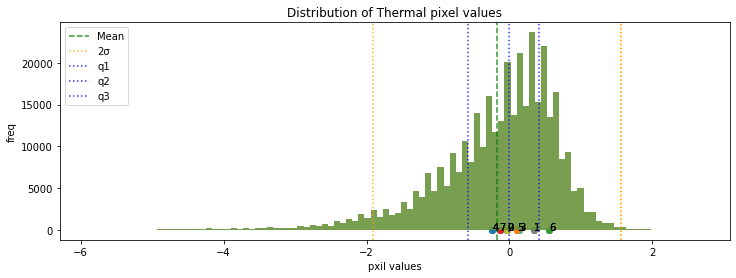

388.jpg Single-Hotspot


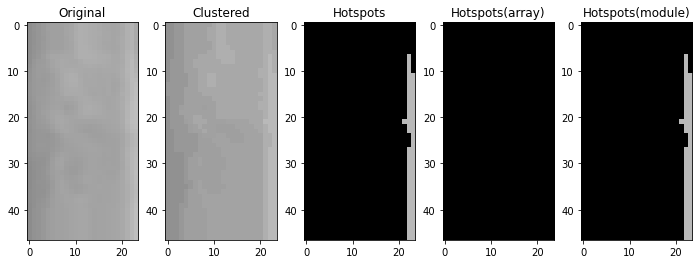

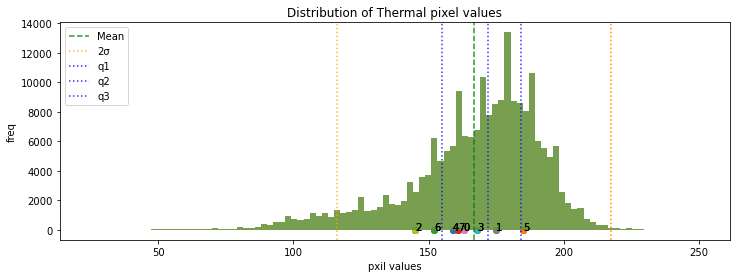

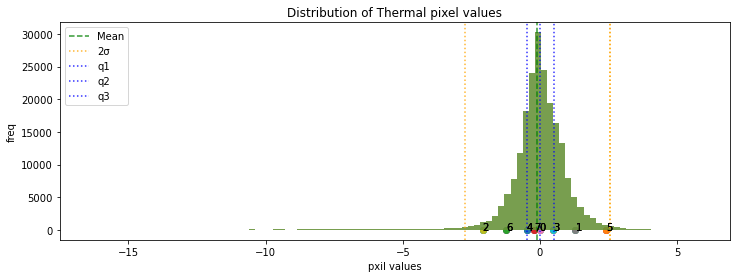

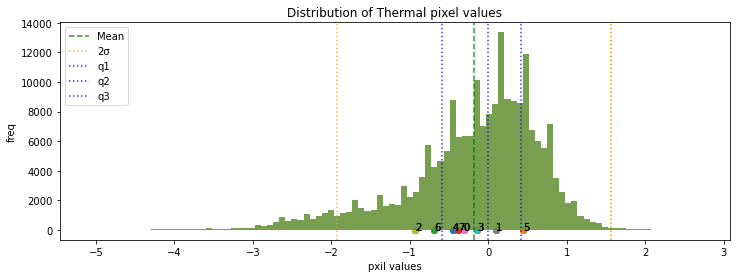

1152.jpg Single-Hotspot


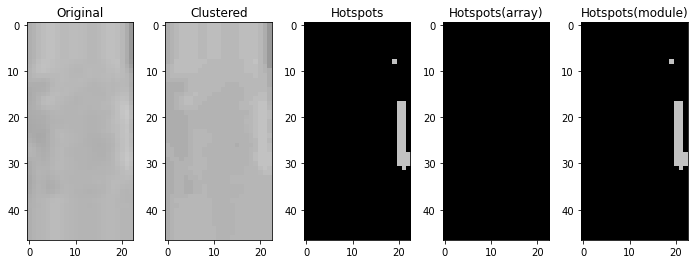

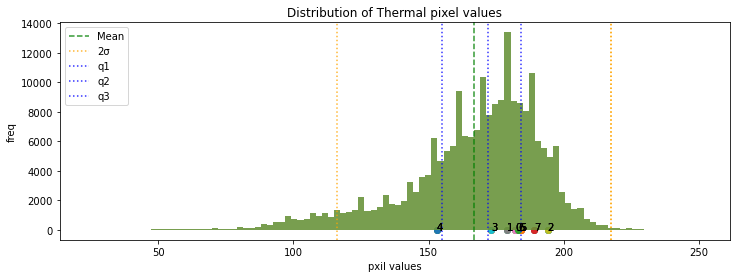

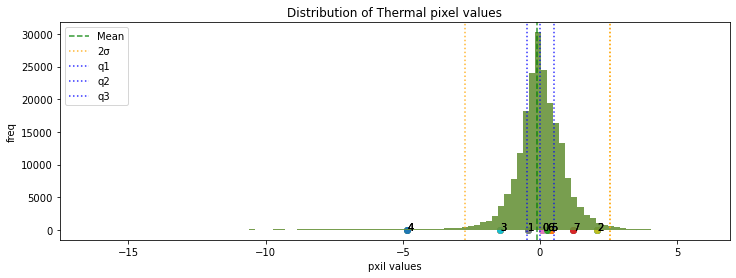

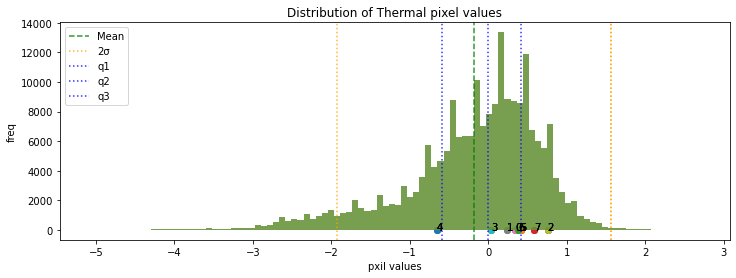

439.jpg Single-Hotspot


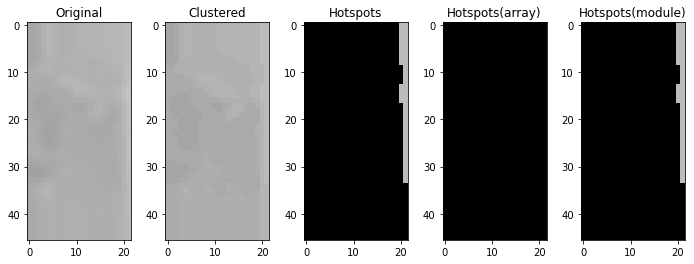

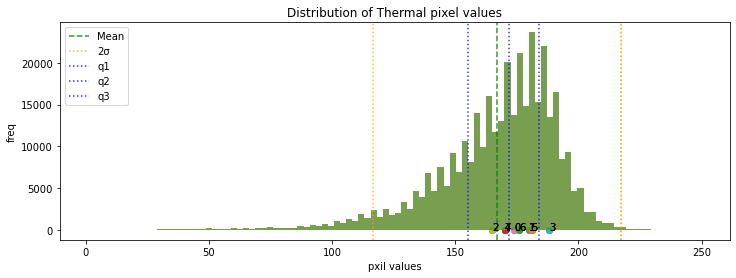

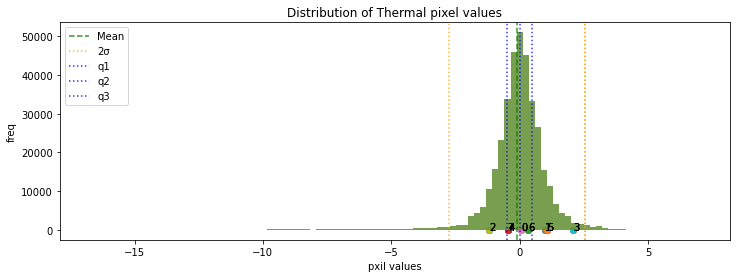

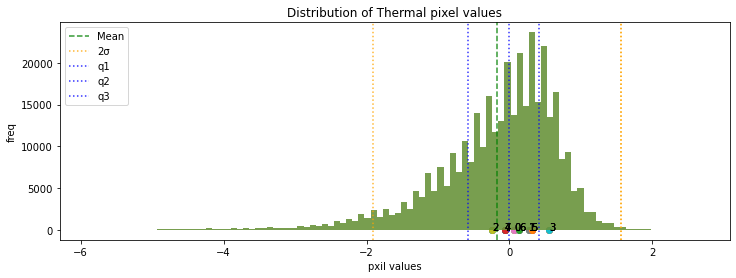

405.jpg Single-Hotspot


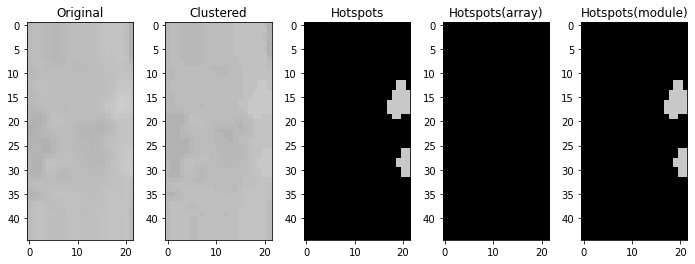

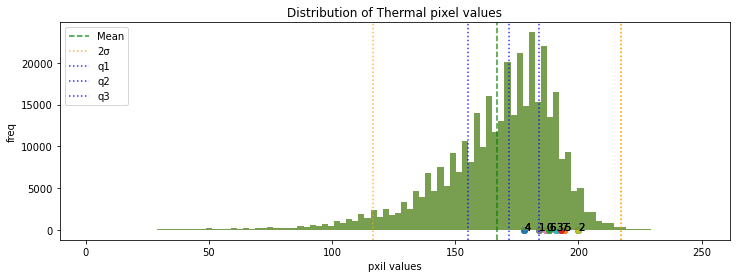

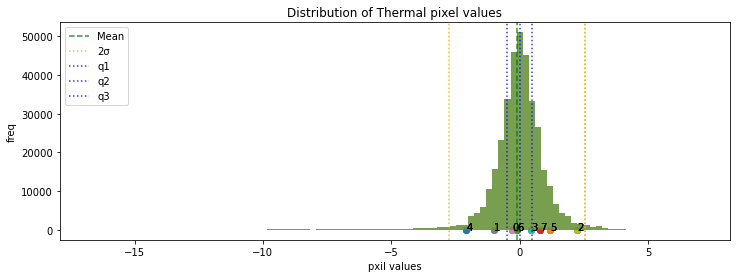

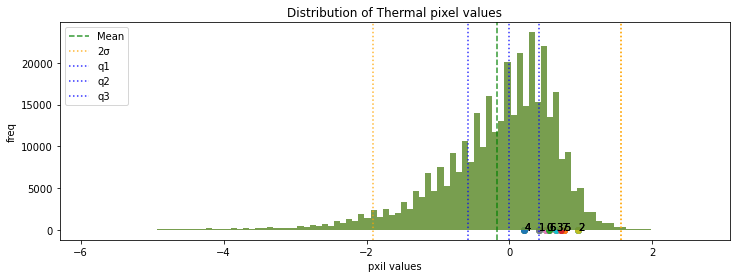

1783.jpg Single-Hotspot


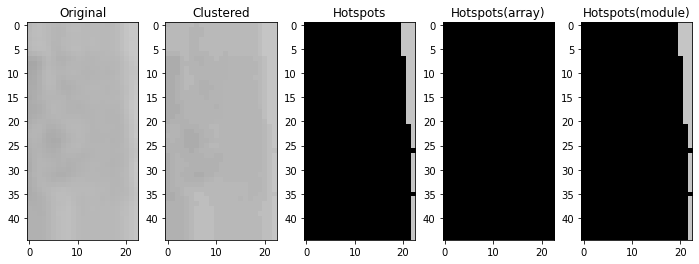

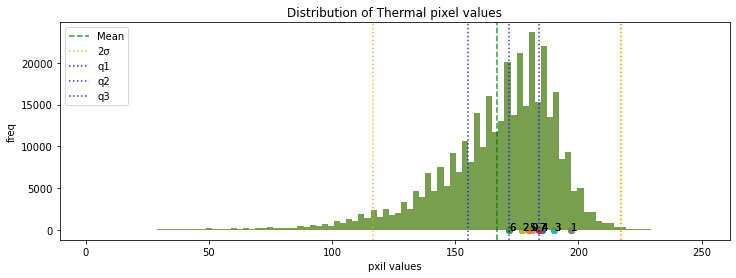

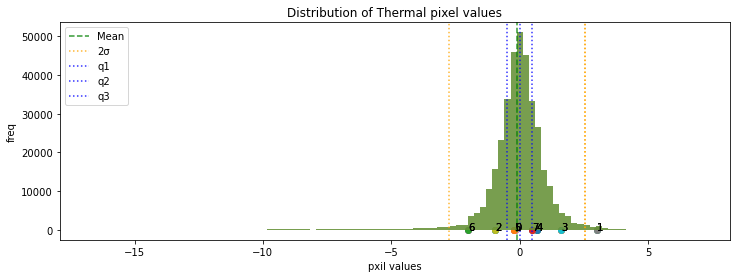

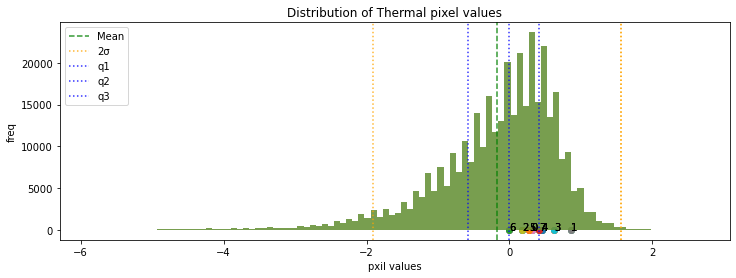

940.jpg Single-Hotspot


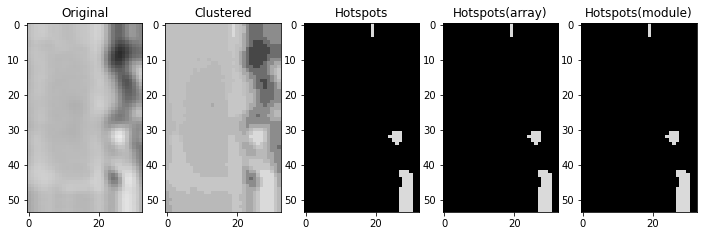

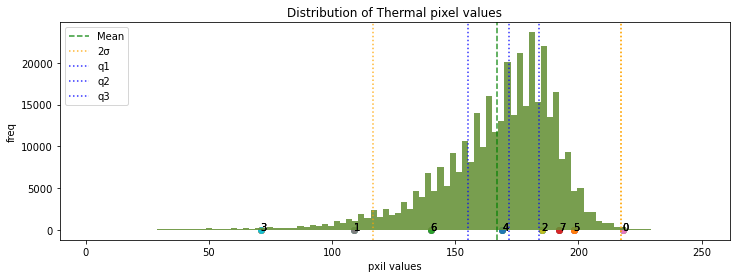

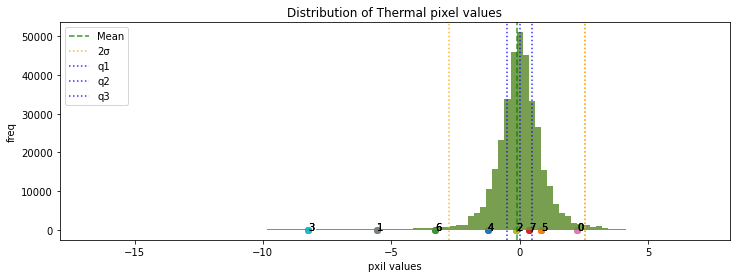

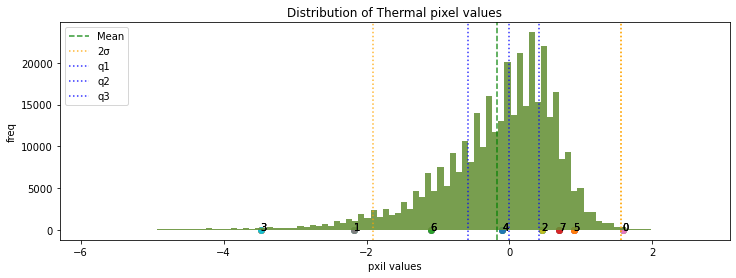

798.jpg Single-Hotspot


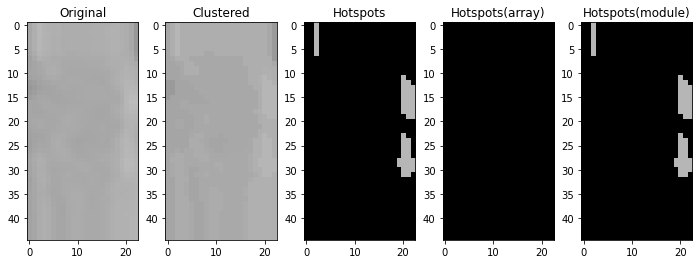

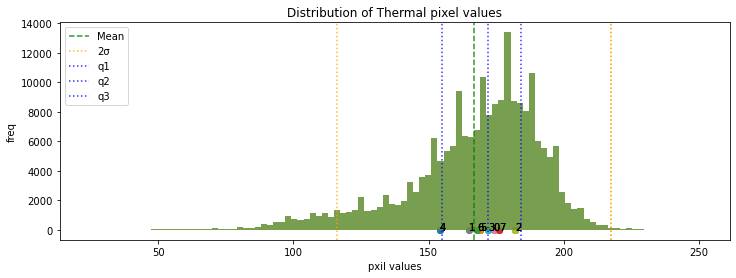

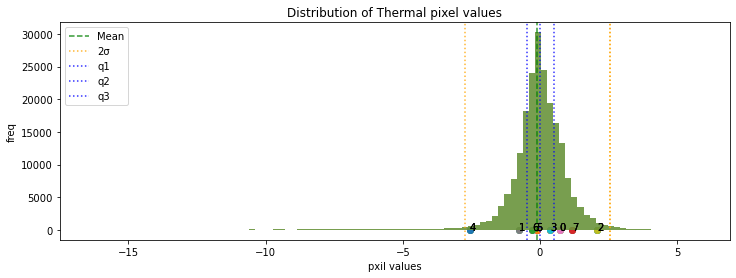

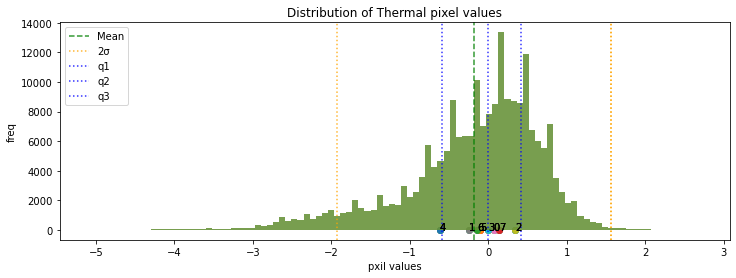

954.jpg Single-Hotspot


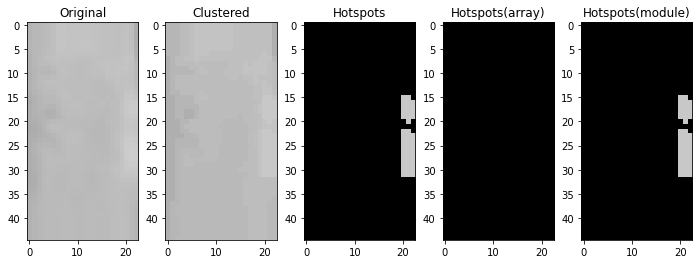

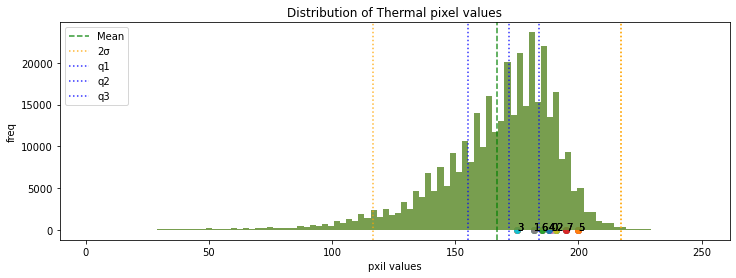

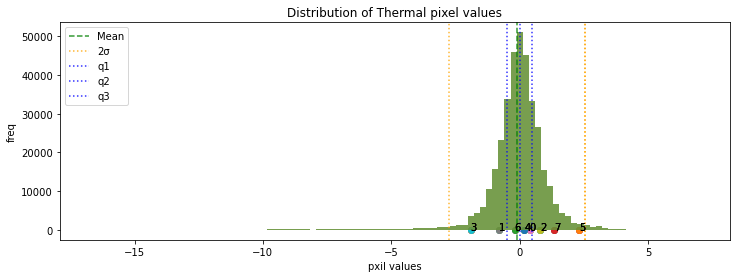

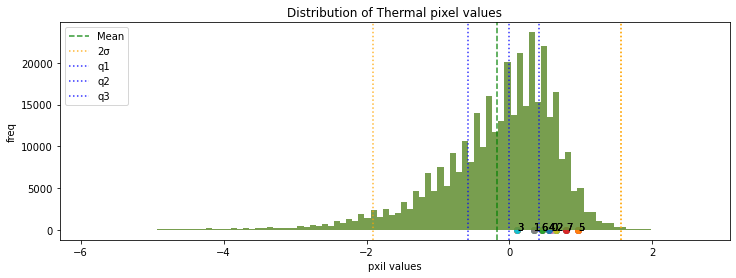

1556.jpg Multi-Hotspots


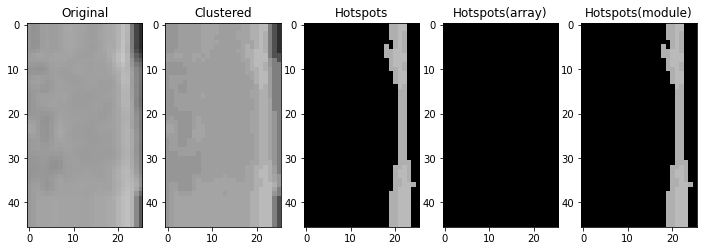

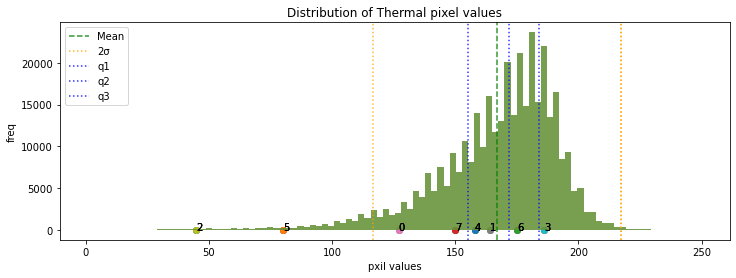

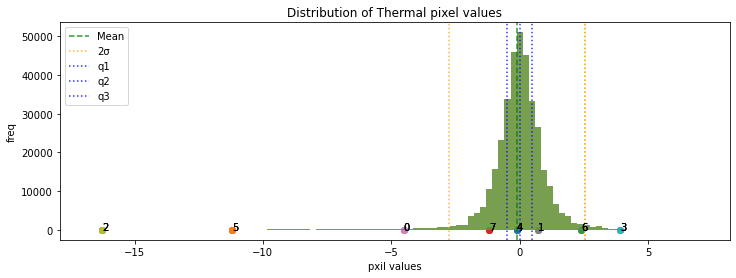

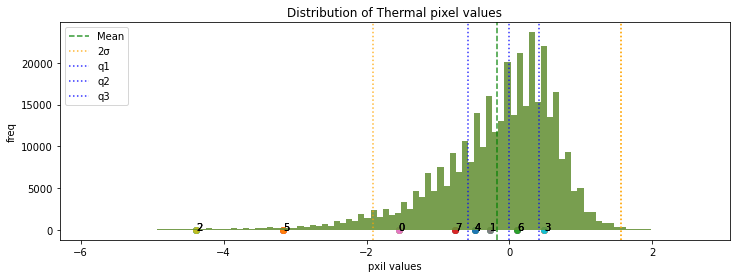

1542.jpg Multi-Hotspots


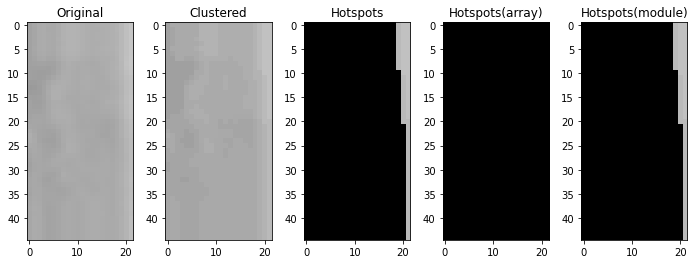

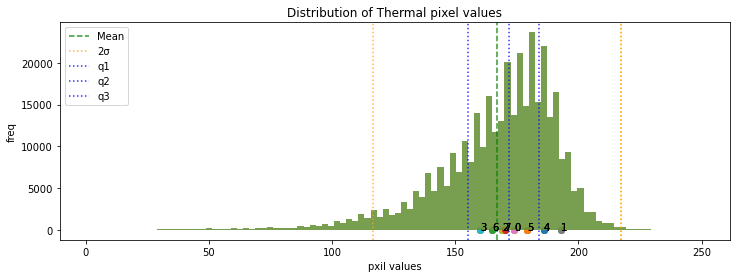

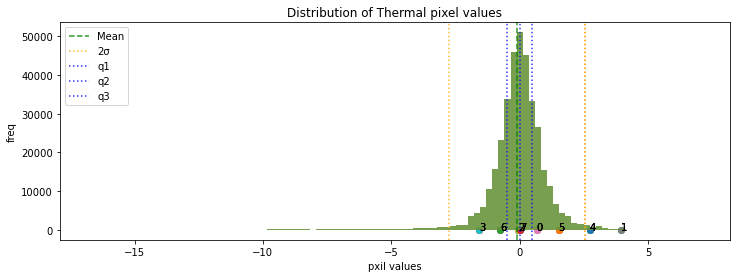

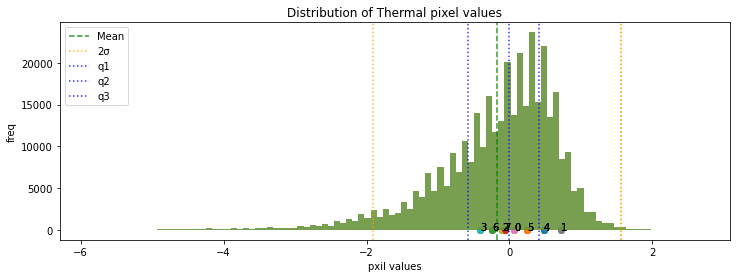

767.jpg Multi-Hotspots


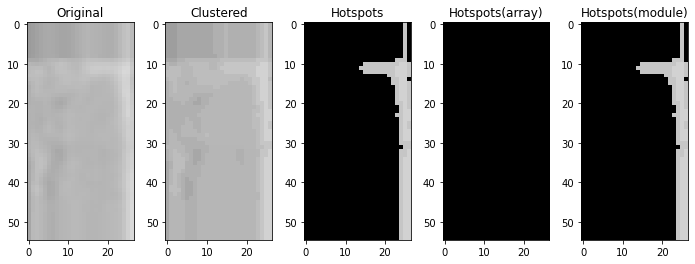

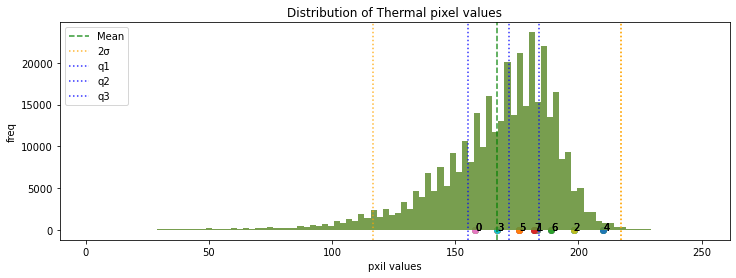

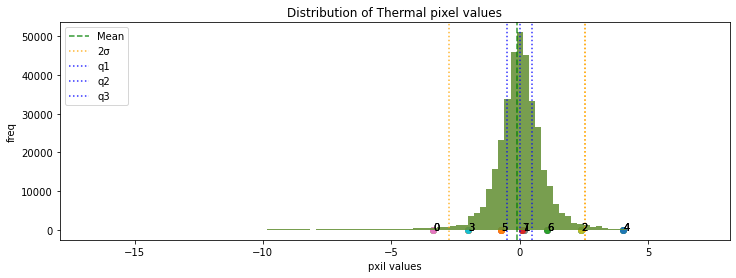

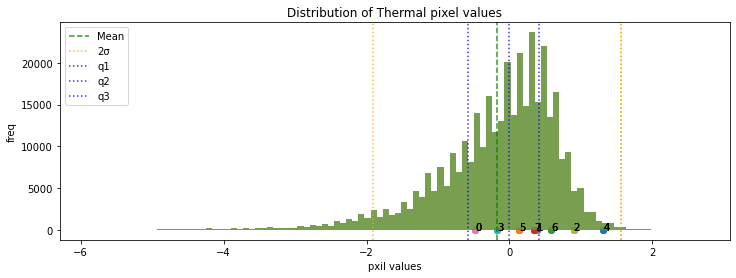

1580.jpg Single-Hotspot


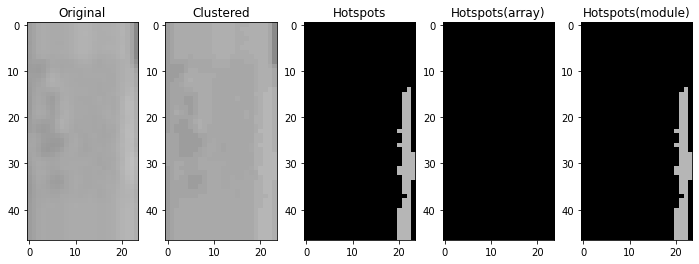

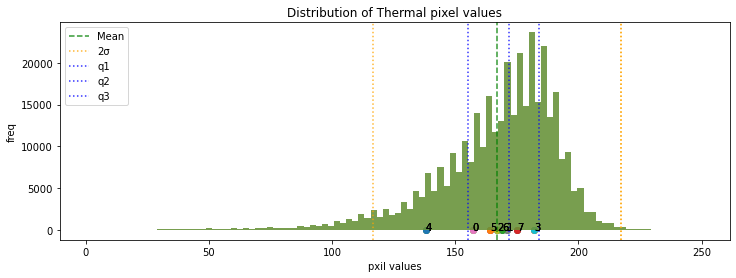

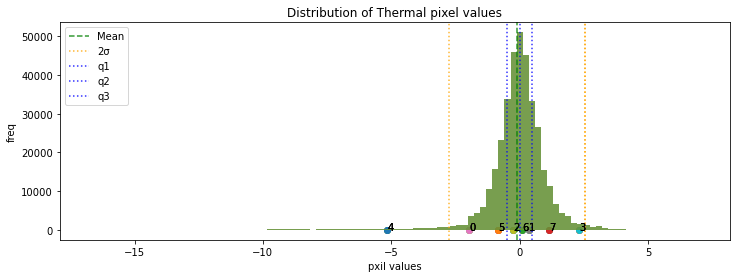

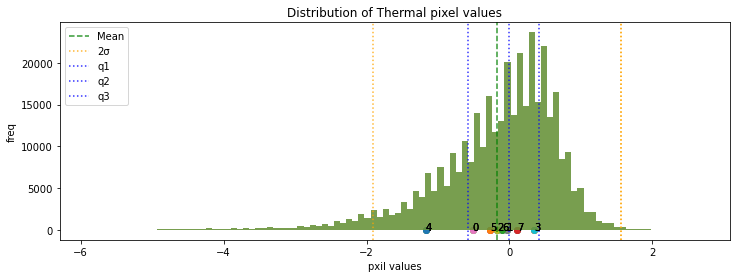

772.jpg Single-Hotspot


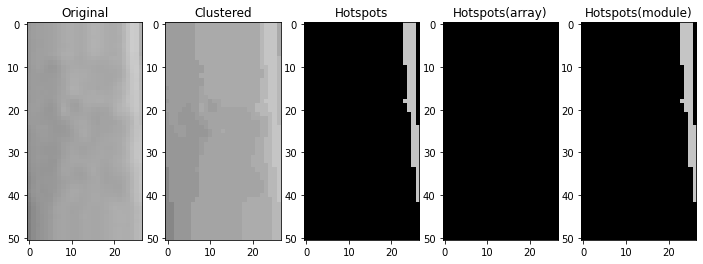

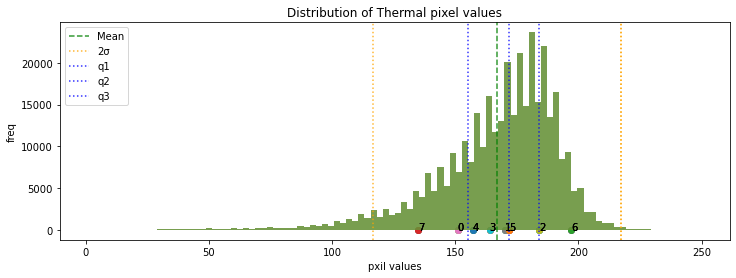

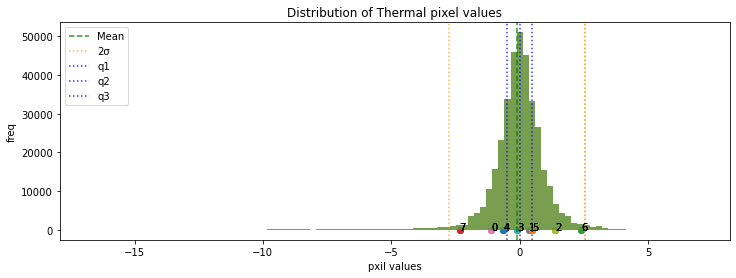

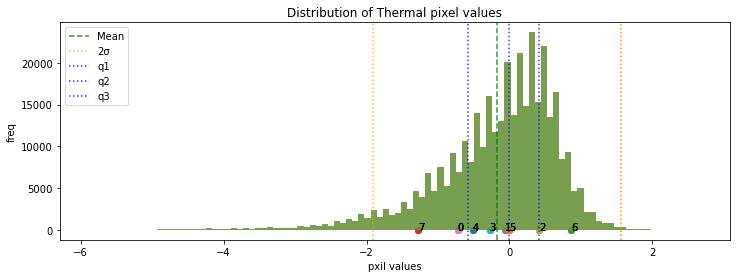

982.jpg Single-Hotspot


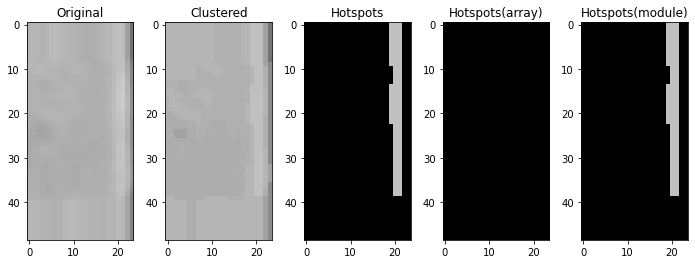

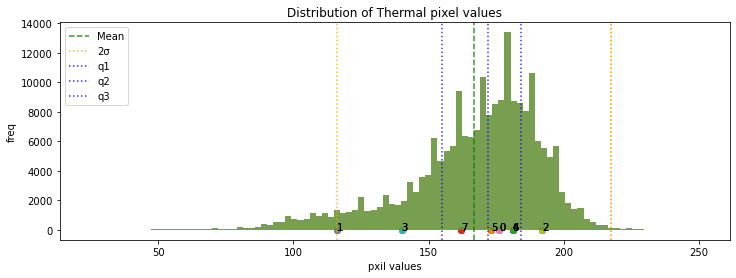

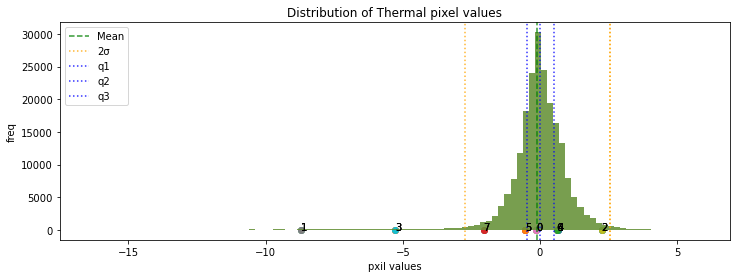

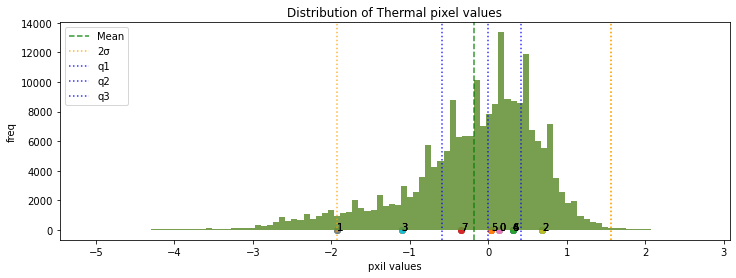

1225.jpg Single-Hotspot


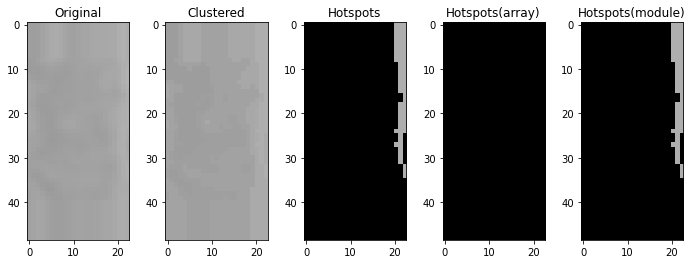

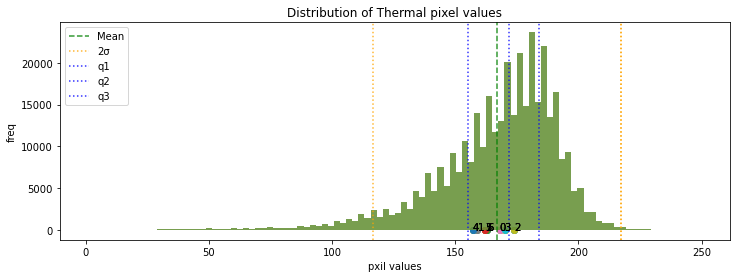

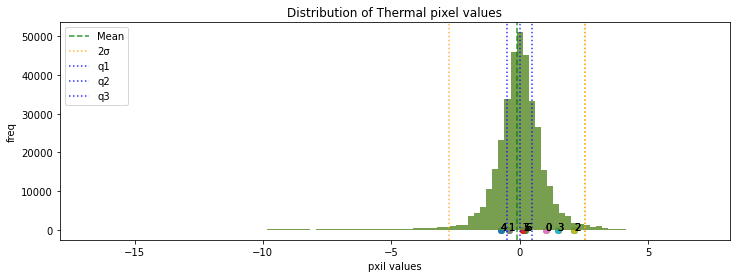

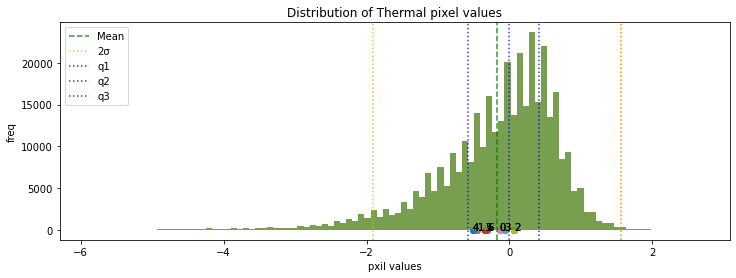

In [24]:
anomaly_modules= {}
#for n, k in enumerate(list(thermal_img_files)[:1]):
for n, k in enumerate(list(thermal_img_files)[:200]):    
    # -- module label --
    l = module_labels[n]
    # -- cluster temperature ---
    clusters = clustering.TemperatureClusters(
        data_array[l].scaled_temperature_with_index[k], method=clustering_method)  
    # -- original cluster --
    sliced_data = clusters.get_clusters_data(data_array[l].temperature[k])    
    original_clusters_temperature = np.stack([np.uint8(t.mean(axis=0)) for t in sliced_data])
    # -- scaled cluster --
    sliced_data = clusters.get_clusters_data(data_array[l].scaled_temperature[k])
    scaled_clusters_temperature = np.stack([t.mean(axis=0) for t in sliced_data ])
    # -- transformed temperature
    transformed_clusters_temperature = array_scaler[l].transform(original_clusters_temperature)
    # -- anomaly detection --    
    hot_pixels_in_array, hot_clusters_in_array = get_hotspots_in_array(
        transformed_clusters_temperature, thermal_img_files[k], log=False) 
    hot_pixels_in_module, hot_clusters_in_module = get_hotspots_in_module(
        scaled_clusters_temperature, transformed_clusters_temperature, 
        thermal_img_files[k], log=False)
    hot_pixels = (hot_pixels_in_array | hot_pixels_in_module)
    hot_clusters = (hot_clusters_in_array | hot_clusters_in_module)
    module_type = anomaly_detection.detect_module_type(hot_clusters, hot_pixels)
    # -- save anomaly modules --
    if module_type not in anomaly_modules:
        anomaly_modules[module_type] = [k]
    else:
        anomaly_modules[module_type].append(k)
    # -- display -- 
    #img_scaled = data_array[l].scaled_temperature[k].reshape(thermal_img_files[k].shape)
    img_clustered = original_clusters_temperature[clusters.labels].reshape(thermal_img_files[k].shape)
    img_hotspots = img_clustered * hot_pixels
    img_hotspots_in_array = img_clustered * hot_pixels_in_array
    img_hotspots_in_module = img_clustered * hot_pixels_in_module
    if module_type != "Normal":
        print(k, module_type)
        display.display_modules({
            "Original": thermal_img_files[k], 
            "Clustered": img_clustered,
            "Hotspots": img_hotspots,
            "Hotspots(array)": img_hotspots_in_array,
            "Hotspots(module)": img_hotspots_in_module,
        })
        display.display_distributions(
        data_array[l].all_temperature,            
            filepath = "./hist/hist_original_" + k,
            cluster_centers = original_clusters_temperature
        )
        display.display_distributions(
            data_array[l].scaled_all_temperature, 
            filepath = "./hist/hist_scaled_" + k,
            cluster_centers = scaled_clusters_temperature
        )    
        display.display_distributions(
            array_scaler[l].transform(data_array[l].all_temperature),
            filepath = "./hist/hist_transformed_" + k,
            cluster_centers = transformed_clusters_temperature
        )    

In [ ]:
# 異常モジュール可視化

In [ ]:
import json
tmp = open("anomaly_modules.json", "w")
json.dump(anomaly_modules, tmp, indent=4, sort_keys=True, separators=(',', ': '))
tmp.close()

In [ ]:
with open('anomaly_modules.json', 'r') as f:
    anomaly_modules = json.load(f)

In [ ]:
modules = Modules(module_contours, anomaly_modules)

In [ ]:
img_con_index = modules.get_img_contours(img_org, index=True)
module_extraction.show_img({"extracted modules":img_con_index},cmap="gray",figsize=(30,30))

In [ ]:
img_con = modules.get_img_contours(img_org, index=False)
img_mask = cv2.bitwise_and(img_org, img_con)
img_mask_index = modules.add_index(img_mask)
module_extraction.show_img({"extracted modules (overlay)":img_mask_index},cmap="gray",figsize=(30,30))

In [ ]:
anomaly_contours = modules.get_anomaly_contours()

In [ ]:
import copy
color_list = {
    "Single-Hotspot": (0,255,255), # aqua
    "Multi-Hotspots": (0,255,0), # green
    "Cluster-Anomaly": (255,255,0), # yellow
    "Module-Anomaly": (255,165,0), # orange
}
img_target_index = copy.deepcopy(img_mask_index)
for k, v in anomaly_contours.items():
    if k == "Normal":
        continue
    else:
        img_target_index = modules.get_img_target_contours(
            img_target_index, v, index=True, color=color_list[k])
module_extraction.show_img(
    {"highlighted modules":img_target_index}, cmap="gray", figsize=(30,30)
)

In [ ]:
img_write = cv2.cvtColor(img_target_index, cv2.COLOR_BGR2RGB)
cv2.imwrite(input_dir_path+'/img_target_index.png',img_write)

In [ ]:
#string_anomaly_labels = modules.get_string_anomaly_labels(anomaly_contours["Module-Anomaly"])

In [ ]:
img_string_index = modules.get_img_target_contours(
    modules.get_img_contours(img_org, index=False),
    anomaly_contours["Module-Anomaly"][string_anomaly_labels>=0], 
    index=True, color=(238,130,238)) # violet

In [ ]:
module_extraction.show_img({"string-anomaly modules":img_string_index},cmap="gray",figsize=(30,30))

In [ ]:
#ToDo
## 異常部分へのマーキング（赤で囲む）
## 分類モデルの改良
## log transform for input temperature
## scaled の画像データを表示